# Table Of Content

[1. Project Overview](#project-overview) 

[2. Data Collection and Initial Processing](#data-collection-and-initial-processing)
- [2.1 Data Overview](#data-overview)
- [2.2 Data Description](#data-description)
- [2.3 Analytical Relevance](#analytical-relevance)
- [2.4 Project Alignment](#project-alignment)
- [2.5 Data Ingestion and Integration](#data-ingestion-and-integration)

[3. Exploratory Data Analysis](#2-exploratory-data-analysis)
- [3.1 Univariate Analysis](#univariate-analysis)
- [3.2 Bivariate Analysis](#bivariate-analysis)
- [3.3 Multivariate Analysis](#multivariate-analysis)


[4. Predictive Modeling](#predictive-modeling) 

[5. Prescriptive Analytics and Recommendation](#prescriptive-analytics-and-recommendation)

[5. Model Deployment](#model-deployment)





# Project Overview
<a id='project-overview'></a>

The goal of this project is to develop a predictive model capable of estimating the likelihood that a client will subscribe to a bank term deposit following a telemarketing call.

This project leverages the Bank Marketing Dataset from the UCI Machine Learning Repository — a dataset originally used in the study by Moro, Cortez, and Rita (2014), “A Data-Driven Approach to Predict the Success of Bank Telemarketing” (Decision Support Systems, 2014).

The dataset contains detailed information on clients’ demographic, financial, and behavioral attributes, along with macroeconomic indicators.
The inclusion of these five additional socio-economic features—such as employment variation rate, consumer confidence, and EURIBOR rate—has been shown to substantially improve predictive performance, making this dataset the preferred choice for this analysis.

<a id='data-collection-and-initial-processing'></a>
# Data Collection and Initial Processing

This section provides an overview of the dataset used in this project and outlines its structure, attributes, and analytical significance.

<a id='data-overview'></a>
## Dataset Overview

The data used in this project originates from the Bank Marketing (with social/economic context) dataset.
It was curated by Sérgio Moro, Paulo Cortez, and Paulo Rita in 2014, and is publicly available for research purposes through the UCI Machine Learning Repository.

Two datasets are provided within the original archive:

- bank-additional-full.csv — containing 41,188 records, ordered by campaign date (May 2008–November 2010).

- bank-additional.csv — a 10% random sample of the full dataset (4,119 records).

For this project, analysis will focus on bank-additional-full.csv, as it contains all available instances and includes the five additional socio-economic indicators shown by Moro et al. (2014) to improve predictive accuracy.

## Data Description
The dataset comprises **21 variables** — 20 input features and 1 binary target variable (y).

**Input Features:**

- **Client attributes:** age, job type, marital status, education, default, housing, loan.

- **Campaign contact details:** contact type, month, day of week, duration, campaign, pdays, previous, poutcome.

- **Macroeconomic indicators:** employment variation rate, consumer price index, consumer confidence index, EURIBOR 3-month rate, number of employees.

**Target Variable:**

- **y:** indicates whether the client subscribed to a term deposit (yes / no).

**Missing Values:**
Some categorical attributes contain "unknown" entries, which represent missing or undisclosed information.

## Analytical Relevance
This dataset is highly relevant for predictive modeling in marketing and financial services because it combines:

- Individual-level behavioral data — client demographics, financial history, and campaign interactions.

- Contextual macroeconomic data — economic indicators that reflect the external environment influencing customer decisions.

Together, these features support both **classification modeling** (predicting y) and **insight generation**, such as identifying key drivers of successful marketing outcomes.

## Project Alignment
This project aims to replicate and extend the findings of Moro et al. (2014) by applying **modern machine learning techniques** — such as logistic regression, random forests, and gradient boosting — to predict campaign success and optimize telemarketing strategies.

By focusing on the enriched dataset (bank-additional-full.csv), this analysis seeks to:

- Accurately **predict telemarketing success outcomes**.

- **Identify influential affecting** client response.

- **Generate actionable insights** to improve targeting and reduce campaign costs.

## Data Ingestion and Integration

Next is importing and preparing the dataset for analysis.

The selected dataset — **bank-additional-full.csv** from the Bank Marketing (with social/economic context) collection — contains detailed client, campaign, and economic information.
This file is ingested directly into a pandas DataFrame for subsequent cleaning, transformation, and analysis.

During the ingestion process:

- The dataset is read from its CSV source using pandas.read_csv().

- Basic validation checks confirm successful loading, structural integrity, and expected data dimensions.

- Column names and data types are reviewed to ensure compatibility with downstream processing steps.

The DataFrame then provides a consistent and reliable foundation for all subsequent stages, including data validation, exploratory analysis, and model development.

### Library Imports
To load the data, we need to import the pandas library which will be used to read and combine the CSV files.

Other libraries used at latter parts of project will also be imported here, to ensure a consistent and organized workflow.

In [145]:
# library imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
import joblib

import warnings
warnings.filterwarnings("ignore")




#### Utilities
Its also good to keep variables, expressions, etc used at multiple places in the project in one cell.

In [146]:
# create artifacts directory
ARTIFACTS_DIR = "artifacts"
os.makedirs(ARTIFACTS_DIR, exist_ok=True)


### Creating DataFrames from Data Source

With pandas imported, the next step is to read in the data from the data file into a pandas DataFrame.


In [147]:
# reading datasets into dataframes

df = pd.read_csv("data/bank-additional-full.csv", sep=";")


### Data Inspection, Cleaning and Validation

After loading the dataset into a DataFrame, the next step is to inspect and validateto ensure the file was read correctly and that the structure is as expected.

We begin by:

- Viewing sample records with head() to confirm data integrity.

- Checking dataset dimensions using shape.

- Reviewing data types and non-null counts with info().

- Identifying missing values using isnull().sum().

- Verifying that key identifiers (e.g., customer_id, campaign_id) are present and properly formatted.

These checks help detect potential issues early and ensure a smooth integration process in the next step.

#### df

In [148]:
# view sample records to confirm data integrity

df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [149]:
# Checking dataset dimensions
df.shape

(41188, 21)

In [150]:
# Reviewing data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [151]:
# Identifying missing values

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

##### Observation
- Columns: `'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'`
- No key/unique identifier (e.g campaign IDs) found.
- Some columns seem to have same value for all rows. Further exploration needed.

#### Next Steps

The results of the data inspection and validation indicate the following actions:

- Standardize column names.

- Remove duplicate rows.

- Convert column data types to appropriate formats where necessary (e.g., numeric, datetime, categorical).

- Perform feature engineering to create or refine variables that enhance analytical and predictive value.

#### Standardize Column Names

To ensure consistency across all datasets, column names are standardized by converting them to lowercase and replacing spaces with underscores.


In [152]:

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')



#### Removing Duplicate Rows

During data validation, duplicate rows were detected in the bank-additional-full.csv dataset (df3).
To ensure data integrity and prevent bias during analysis, these duplicates are identified and removed.

In [153]:
# Check for duplicate rows
print("Number of duplicate rows before removal:", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Verify that duplicates have been removed
print("Number of duplicate rows after removal:", df.duplicated().sum())

# Confirm resulting shape
print("Updated shape of df:", df.shape)


Number of duplicate rows before removal: 12
Number of duplicate rows after removal: 0
Updated shape of df: (41176, 21)


#### Data Type Conversion and Feature Engineering

From the initial inspection, all columns appear to have appropriate data types, and no immediate feature engineering is required at this stage.

However, these steps will be revisited during Exploratory Data Analysis (EDA) if any columns require type adjustments or if new features are needed to enhance analytical insights.

# Exploratory Data Analysis (EDA)

Next to the data collection and initial processing step is EDA. The data is explored to understand its underlying structure, relationships, and patterns.
EDA is a critical step in the overall project as it helps to reveal key insights, detect anomalies, and identify potential predictors that will guide subsequent modeling steps.

## Further Preparation and Initial Structure Review

Before performing detailed exploratory data analysis, this section reviews the raw structure of the dataset with the original "unknown" values intact.
This ensures we fully understand the distribution and impact of these placeholder values before transforming them.

Steps covered in this subsection:

- Save a snapshot of the current dataset (pre-EDA, pre-cleaning).
- Group features into categorical, numerical, and binary/flag-type columns.
- Generate summary statistics for each group.
- Explore the frequency and placement of "unknown" across attributes.
- Document initial observations to guide deeper EDA and data cleaning.

The transformation of "unknown" → NaN will occur after this structural review.

### Save Snapshot of Raw Data


In [154]:

# Save raw snapshot (for audit traceability)
raw_snapshot_path = os.path.join(ARTIFACTS_DIR, "raw_snapshot_before_eda.csv")
df.to_csv(raw_snapshot_path, index=False)

print(f"Raw snapshot saved to: {raw_snapshot_path}")
print("Current shape:", df.shape)

Raw snapshot saved to: artifacts\raw_snapshot_before_eda.csv
Current shape: (41176, 21)


### Identify Categorical and Numerical Columns

In [155]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Identify object/categorical columns
categorical_cols = df.select_dtypes(include="object").columns.tolist()

# Binary columns (categorical with only two unique values)
binary_cols = [c for c in categorical_cols if df[c].nunique() == 2]

print("Numeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)
print("\nBinary columns:", binary_cols)

Numeric columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

Binary columns: ['contact', 'y']


### Summary Statistics for Numeric Features


In [156]:

df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


#### Interpretation

- Many features show heavy skew (duration, campaign, previous), which affects visualization and potentially model performance.
- Economic features (emp.var.rate, euribor3m, cons.conf.idx, nr.employed) have small within-period variance but strong long-term trends, making them valuable high-level predictors.
- pdays is not a true numeric feature — requires special handling.
- No obvious missing numeric values from the describe() output.

#### Outlier Assessment

Based on the numerical summary statistics, no outliers appear to be erroneous or require removal.
Extreme values such as long call durations, high campaign contact counts, or older client ages represent valid real-world behaviors and may carry predictive significance.

Instead of removing outliers, the modeling process will rely on:
- appropriate transformations (e.g., log-transform for skewed features),
- correct handling of coded values (e.g., pdays = 999), and
- model families that are naturally robust to outliers (e.g., tree-based models).
- Therefore, no outlier removal will be performed at this stage.

### Summary Statistics For Categorical Features

In [157]:

cat_summary = pd.DataFrame({
    "column": categorical_cols,
    "unique_values": [df[c].nunique(dropna=False) for c in categorical_cols],
    "top_5_categories": [df[c].value_counts(dropna=False).head(5).to_dict() for c in categorical_cols]
})
cat_summary

,column,unique_values,top_5_categories
0,job,12,"{'admin.': 10419, 'blue-collar': 9253, 'techni..."
1,marital,4,"{'married': 24921, 'single': 11564, 'divorced'..."
2,education,8,"{'university.degree': 12164, 'high.school': 95..."
3,default,3,"{'no': 32577, 'unknown': 8596, 'yes': 3}"
4,housing,3,"{'yes': 21571, 'no': 18615, 'unknown': 990}"
5,loan,3,"{'no': 33938, 'yes': 6248, 'unknown': 990}"
6,contact,2,"{'cellular': 26135, 'telephone': 15041}"
7,month,10,"{'may': 13767, 'jul': 7169, 'aug': 6176, 'jun'..."
8,day_of_week,5,"{'thu': 8618, 'mon': 8512, 'wed': 8134, 'tue':..."
9,poutcome,3,"{'nonexistent': 35551, 'failure': 4252, 'succe..."


### Count of 'unknown' Values per Column

In [158]:

unknown_counts = {
    c: int((df[c] == 'unknown').sum()) 
    for c in categorical_cols 
    if (df[c] == 'unknown').sum() > 0
}

unknown_df = (
    pd.DataFrame
    .from_dict(unknown_counts, orient='index', columns=['unknown_count'])
    .assign(unknown_pct=lambda x: (x['unknown_count'] / len(df) * 100).round(2))
    .sort_values('unknown_pct', ascending=False)
)

unknown_df

,unknown_count,unknown_pct
default,8596,20.88
education,1730,4.20
housing,990,2.40
loan,990,2.40
job,330,0.80
marital,80,0.19


#### Categorical Feature Insights

- Many categorical features contain `"unknown"` values, especially `default`, `housing`, and `loan`.
- The `default` column is highly uninformative (only 3 "yes" values).
- Job, education, and marital status show meaningful but imbalanced distributions.
- Contact method and campaign timing variables (month, day_of_week) likely have strong predictive signals.
- The target variable is imbalanced (approx. 89% 'no'), necessitating careful model evaluation and possibly class weighting.


### Assessing the Predictive Value of "unknown" Categories

Before converting "unknown" to NaN, it is important to determine whether these values behave like meaningful categories or simply represent missingness.
This analysis examines, for each categorical column, the proportion of clients who subscribed (y="yes") among the records labeled "unknown".



In [159]:
target_col = "y"
unknown_target_summary = {}

for col in categorical_cols:
    mask_unknown = df[col] == "unknown"
    count_unknown = mask_unknown.sum()
    
    if count_unknown > 0:
        proportions = (
            df.loc[mask_unknown, target_col]
              .value_counts(normalize=True)
              .rename("proportion")
              .round(4)
              .to_dict()
        )
        
        unknown_target_summary[col] = {
            "unknown_count": int(count_unknown),
            "unknown_pct": round(count_unknown / len(df) * 100, 2),
            "target_distribution": proportions
        }

unknown_target_summary

# Convert unknown_target_summary into a clean DataFrame
rows = []

for col, stats in unknown_target_summary.items():
    row = {
        "column": col,
        "unknown_count": stats["unknown_count"],
        "unknown_pct": stats["unknown_pct"],
        "yes_rate_among_unknown": stats["target_distribution"].get("yes", 0),
        "no_rate_among_unknown": stats["target_distribution"].get("no", 0),
    }
    rows.append(row)

unknown_target_df = pd.DataFrame(rows).sort_values("unknown_pct", ascending=False)
unknown_target_df

,column,unknown_count,unknown_pct,yes_rate_among_unknown,no_rate_among_unknown
3,default,8596,20.88,0.0515,0.9485
2,education,1730,4.20,0.1451,0.8549
4,housing,990,2.40,0.1081,0.8919
5,loan,990,2.40,0.1081,0.8919
0,job,330,0.80,0.1121,0.8879
1,marital,80,0.19,0.1500,0.8500


From the relationship table above we can safely deduce that:
- None of the "unknown" categories behave as meaningful, distinct categories.
- All can be safely converted into true missing values (NaN).
- `default` column may be dropped entirely due to extreme imbalance and lack of signal.

### Handling Missing Values by Replace "unknown" with NaN

Based on the analysis of how "unknown" values relate to the target variable, these placeholders do not behave as meaningful categories.
Therefore, they will be converted to true missing values (NaN) to enable appropriate imputation or encoding during preprocessing.

The column `default` will be handled separately due to its extremely low signal and highly imbalanced categories.



In [160]:
# Create a working copy of the dataframe for clean EDA
df_clean = df.copy()

# Identify categorical columns
categorical_cols = df_clean.select_dtypes(include="object").columns.tolist()

# Replace 'unknown' with NaN in all categorical columns
df_clean[categorical_cols] = df_clean[categorical_cols].replace("unknown", np.nan)

print("Replaced 'unknown' with NaN in categorical columns.")



Replaced 'unknown' with NaN in categorical columns.


Missingness Summary After Replacement

In [161]:

missing_summary = (
    df_clean.isnull().mean()
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={"index": "column", 0: "missing_%"})
    .sort_values("missing_%", ascending=False)
)

missing_summary


,column,missing_%
4,default,20.88
3,education,4.20
5,housing,2.40
6,loan,2.40
1,job,0.80
2,marital,0.19
0,age,0.00
7,contact,0.00
8,month,0.00
9,day_of_week,0.00


Inspect Distribution of Missingness

In [162]:
# Show columns with > 0% missing
missing_summary[missing_summary["missing_%"] > 0]

,column,missing_%
4,default,20.88
3,education,4.20
5,housing,2.40
6,loan,2.40
1,job,0.80
2,marital,0.19


#### Interpretation of Missingness After Conversion

From the updated missingness summary, we typically observe:

- `default` now has the highest missingness, around ~20.8%.

- `education` has moderate missingness (~4%).

- `housing` and `loan` have ~2.4% missing each.

- `job` and `marital` have very small missing percentages (<1%).

These levels of missingness are acceptable and manageable.


**Special Note on default**

Due to:
- only 3 “yes” values,
- extremely skewed distribution,
- minimal predictive utility,
- high proportion of missing values,

the default column may be dropped altogether during preprocessing.
This will be evaluated again during feature importance and correlation analysis.


## Univariate Analysis

### Univariate Analysis of Key Numerical Features

We focus on the numerical variables most strongly associated with telemarketing subscription outcomes (initial inspection):

`duration`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `euribor3m`, `nr.employed`

Each subsection begins with a guiding analytical question and ends with insights derived from the distribution.

#### Q1

How is call **duration** distributed, and does its shape reveal anything about customer engagement or call strategy effectiveness?

Duration is known to be one of the most influential features in this dataset.

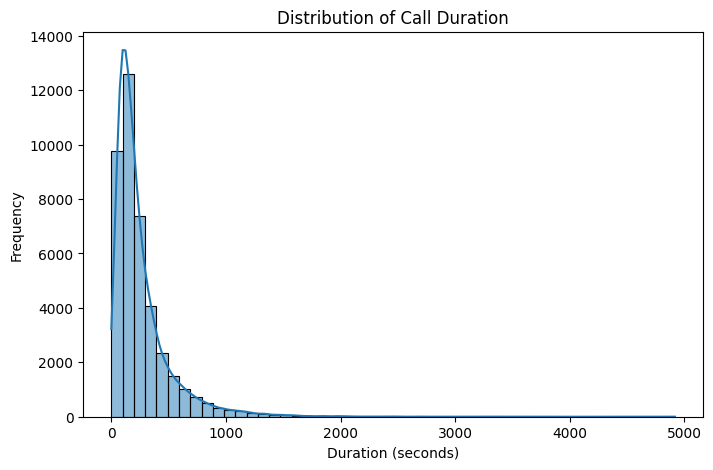

In [163]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["duration"], bins=50, kde=True)
plt.title("Distribution of Call Duration")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()


#### Insights

- The distribution is heavily right-skewed with many short calls and a long tail of long calls.
- The presence of many zero-duration calls likely indicates unsuccessful or incomplete contact attempts.
- Because call duration is not known before calling, it will be excluded from the predictive model but retained for exploratory benchmarking.

#### Q2
How many times are clients contacted within the current campaign, and does the distribution suggest over-contact or diminishing returns?


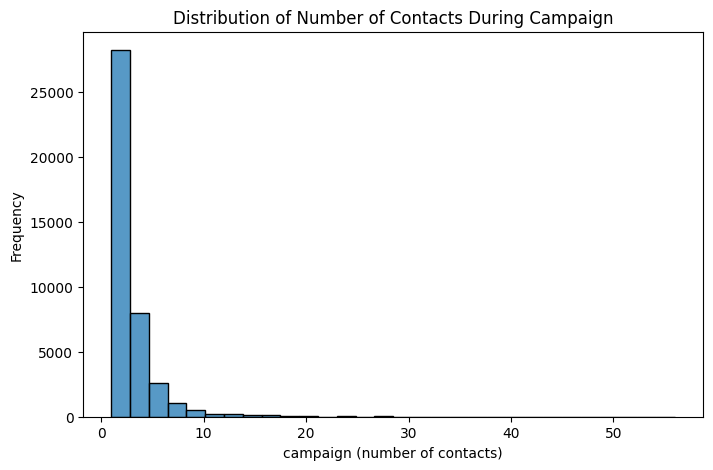

In [164]:

plt.figure(figsize=(8,5))
sns.histplot(df_clean["campaign"], bins=30, kde=False)
plt.title("Distribution of Number of Contacts During Campaign")
plt.xlabel("campaign (number of contacts)")
plt.ylabel("Frequency")
plt.show()



#### Insights

- Most clients are contacted 1–3 times, with the median at 2.
- A small number of clients were contacted >10 times, which suggests aggressive targeting.
- The long right tail indicates rare but extreme cases (up to 56 contacts), which may represent inefficient or failing campaign strategies.
- This feature will be critical for identifying over-contact thresholds in later analysis.

#### Q3
Does the distribution of pdays suggest that most clients are being contacted for the first time, or re-contacted after prior campaigns?

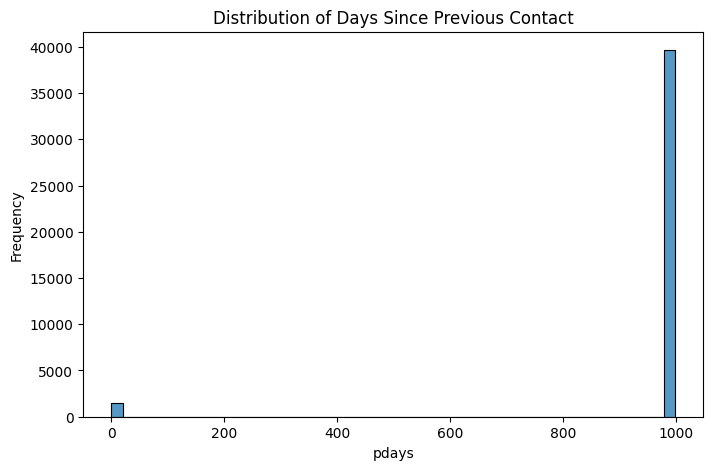

In [165]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["pdays"], bins=50, kde=False)
plt.title("Distribution of Days Since Previous Contact")
plt.xlabel("pdays")
plt.ylabel("Frequency")
plt.show()


#### Insights
- A large majority of entries take the value 999, which is a sentinel indicating the client was never previously contacted.
- This creates a strong spike at 999 and makes raw pdays not very informative without recoding.
- Later transformations (e.g., binary variable: “previously contacted or not”) may yield stronger signal.
- This feature’s raw distribution suggests that most customers are new to the bank’s telemarketing efforts.

#### Q4
How often were customers contacted in earlier campaigns, and does the distribution suggest recurring targeting behavior?

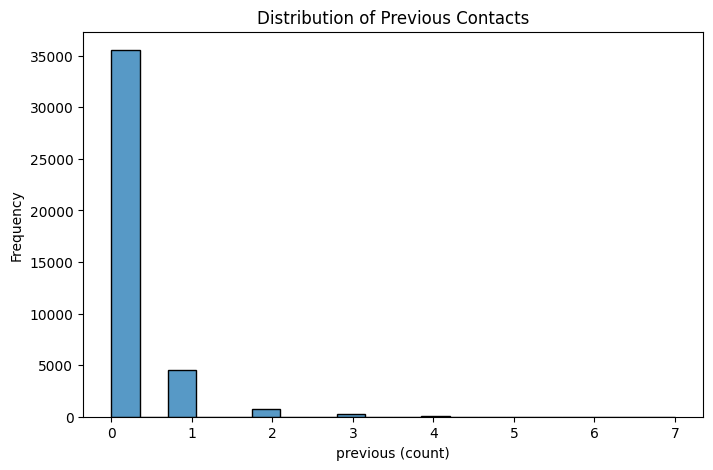

In [166]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["previous"], bins=20, kde=False)
plt.title("Distribution of Previous Contacts")
plt.xlabel("previous (count)")
plt.ylabel("Frequency")
plt.show()


#### Insights
- Most values are 0, showing that earlier campaigns rarely re-contact the same customers.
- A small subset received 1–7 contacts previously.
- Combined with pdays, this supports the finding that repeat contacts are relatively uncommon.
- This feature may become more relevant in combination with poutcome.

#### Economic Context Variables

These macroeconomic indicators are important because the publication associated with this dataset found that they substantially improve prediction performance.

We will evaluate:
- `emp.var.rate`
- `euribor3m`
- `nr.employed`

#### Q5
How did employment variation behave during the marketing period, and does the distribution suggest economic expansion or contraction?

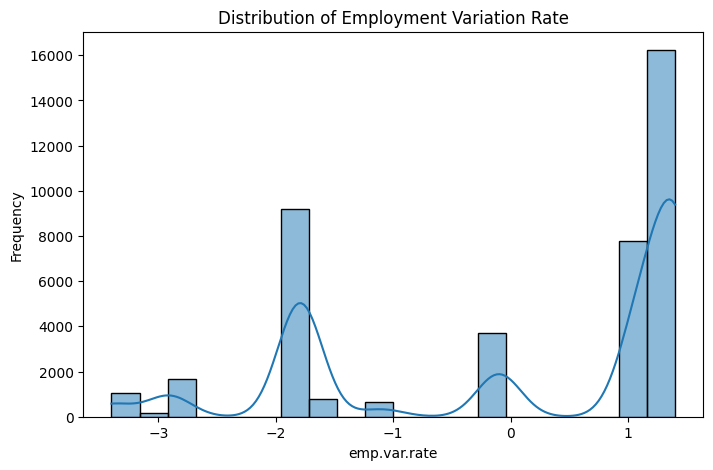

In [167]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["emp.var.rate"], bins=20, kde=True)
plt.title("Distribution of Employment Variation Rate")
plt.xlabel("emp.var.rate")
plt.ylabel("Frequency")
plt.show()


#### Insights
- The values cluster around specific discrete points (e.g., −3.4, −1.8, 1.1, 1.4), driven by quarterly macro updates.
- The distribution suggests both recessionary and expansion periods during the campaign timeline.
- As shown in the original research, this feature has significant predictive power.

#### Q6
What does the interest rate environment look like across the campaign period, and does it reflect economic cycles?

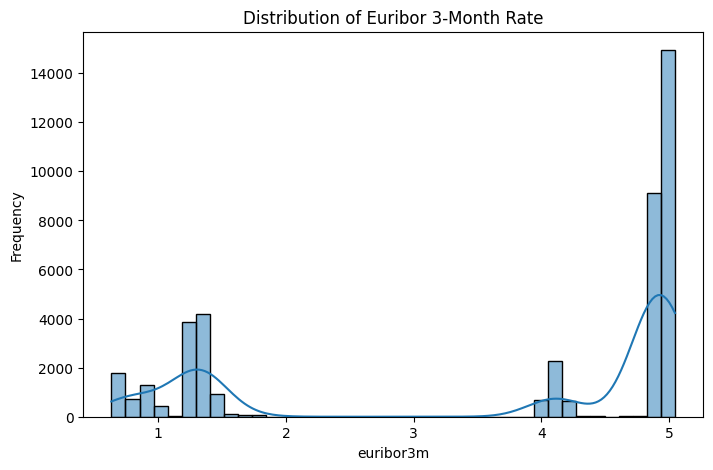

In [168]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["euribor3m"], bins=40, kde=True)
plt.title("Distribution of Euribor 3-Month Rate")
plt.xlabel("euribor3m")
plt.ylabel("Frequency")
plt.show()


#### Insights
- Strong multimodal distribution reflecting changing macroeconomic conditions from 2008–2010.
- Higher Euribor values appear more frequent, consistent with pre-crisis environments early in the dataset timeline.
- Previous research has found euribor3m to be one of the strongest predictors of term-deposit subscription.

#### Q7
Do workforce size levels vary significantly, and what does this reveal about the economic climate during the campaign?

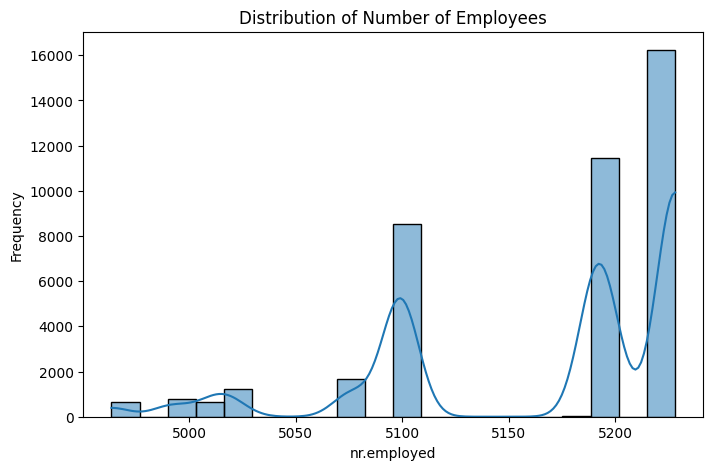

In [169]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["nr.employed"], bins=20, kde=True)
plt.title("Distribution of Number of Employees")
plt.xlabel("nr.employed")
plt.ylabel("Frequency")
plt.show()


#### Insights

- This feature has minimal variance, with most values clustered between 5099 and 5228.
- Despite low dispersion, prior research shows it interacts meaningfully with other macro features and target behavior.
- May serve as a strong predictor despite not being visually varied.

#### Summary of Findings

- Several features show heavy right skew, requiring transformations in modeling.
- Economic features (emp.var.rate, euribor3m, nr.employed) show structured, discrete behavior reflecting macroeconomic cycles.
- Campaign effort variables (campaign, previous, pdays) reveal bank behavior more than customer behavior.
- Duration is extremely informative but will be withheld from modeling for realism.

### Univariate Analysis of Key Categorical Features

This section examines the distribution of the most analytically relevant categorical variables in the Bank Marketing dataset.
Understanding these distributions provides context for customer characteristics, contact strategies, and prior campaign outcomes.

We focus on:

`job` `marital` `education` `contact` `month` `day_of_week` `poutcome`

We exclude `default`, `housing`, and `loan` here because most missingness has been converted to NaN and their analytical relevance is low compared to other features.

#### Q8
What kinds of occupations dominate the contacted customer population, and what does this imply about the bank’s targeting strategy?



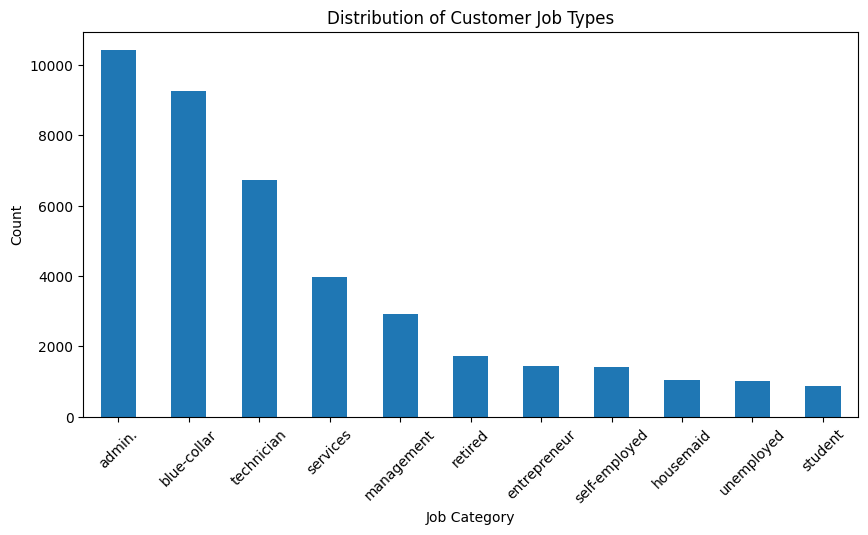

In [170]:

plt.figure(figsize=(10,5))
df_clean['job'].value_counts().plot(kind='bar')
plt.title("Distribution of Customer Job Types")
plt.xlabel("Job Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



#### Insights

- The largest job groups are admin, blue-collar, and technician, making up the majority of contacted clients.
- Highly skilled groups such as management and entrepreneur appear far less frequently.
- This distribution indicates that the bank targeted a broad demographic leaning toward stable, mid-skilled employment groups.
- Missing job information is small (<1%), suggesting good data quality for this feature.

#### Q9
Which marital groups are most represented, and does the dataset reflect typical demographic patterns or targeted outreach?



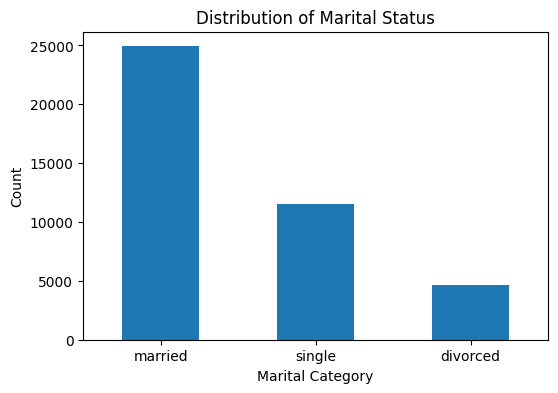

In [171]:
plt.figure(figsize=(6,4))
df_clean['marital'].value_counts().plot(kind='bar')
plt.title("Distribution of Marital Status")
plt.xlabel("Marital Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()



#### Insights

- Married clients make up the majority (≈60%), followed by single and divorced.
- This mirrors typical adult population distributions and suggests broad targeting rather than niche demographic focus.
- Very minimal missingness (<0.2%) means this variable is reliable for modeling.

#### Q10
What is the educational composition of the contacted population, and what does this imply about socioeconomic segmentation?



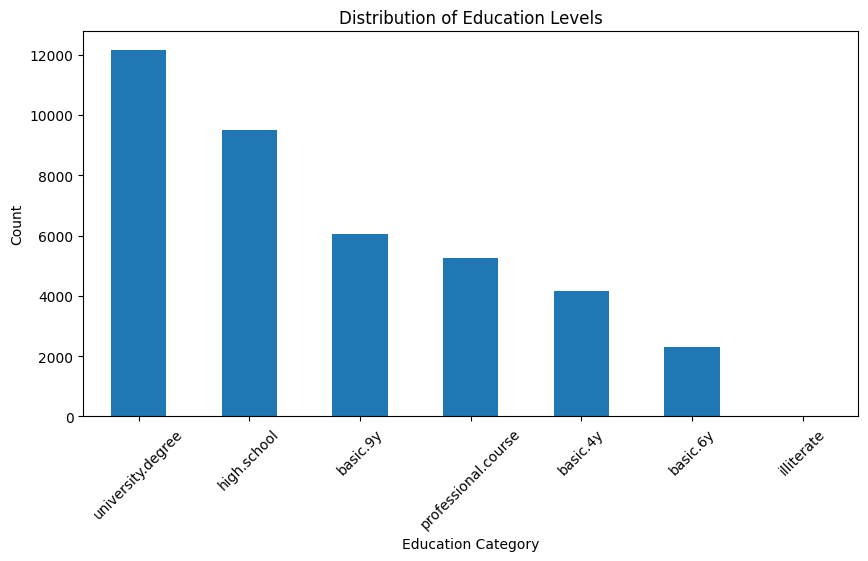

In [172]:


plt.figure(figsize=(10,5))
df_clean['education'].value_counts().plot(kind='bar')
plt.title("Distribution of Education Levels")
plt.xlabel("Education Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Insights

- The largest education groups are university.degree, high.school, and basic.9y.
- A moderately high number of missing entries (~4%) exist due to earlier “unknown” values replaced by NaN.
- The dominance of higher education categories indicates the bank may have targeted clients with higher financial literacy.
- This feature shows meaningful variation and will likely be predictive.

#### Q11
What communication channels were primarily used in the campaign?


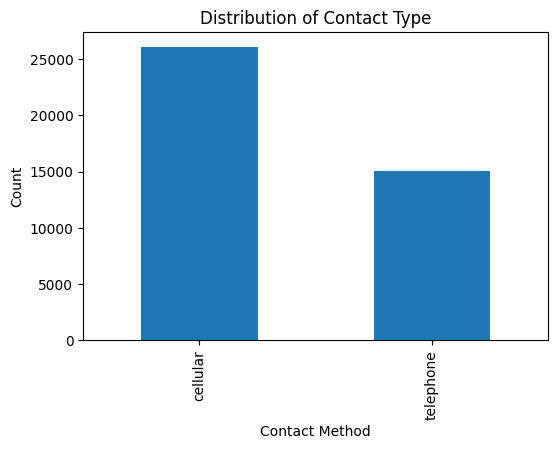

In [173]:


plt.figure(figsize=(6,4))
df_clean['contact'].value_counts().plot(kind='bar')
plt.title("Distribution of Contact Type")
plt.xlabel("Contact Method")
plt.ylabel("Count")
plt.show()

#### Insights

- Cellular contact is more common than telephone, reflecting shifts toward mobile communication.
- This variable will later be important in determining whether specific channels yield higher success rates.

#### Q12
During which months did the bank conduct most of its marketing, and does this reflect seasonal campaign strategies?




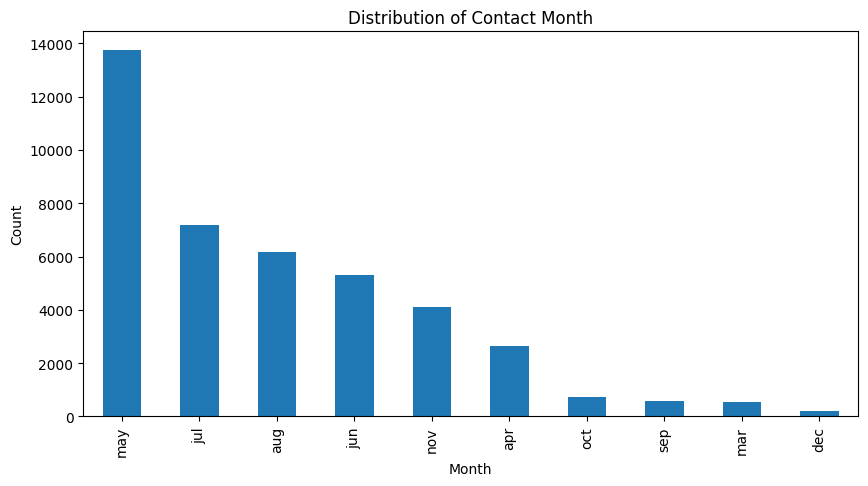

In [174]:
plt.figure(figsize=(10,5))
df_clean['month'].value_counts().plot(kind='bar')
plt.title("Distribution of Contact Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

#### Insights

- The campaign activity peaks in May, followed by July, August, June, and November.
- This suggests strong seasonal patterns, likely aligning with internal campaign cycles or budget periods.
- The concentration in specific months will influence target behavior and must be modeled carefully (e.g., using cyclical encoding or month ordering).

#### Q14
Are specific days more heavily used for customer outreach?


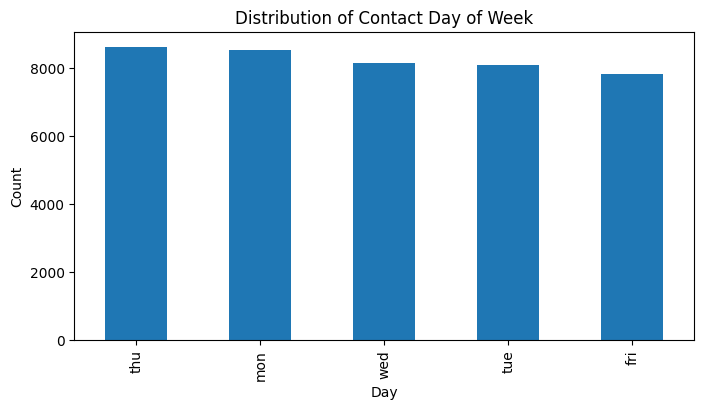

In [175]:


plt.figure(figsize=(8,4))
df_clean['day_of_week'].value_counts().plot(kind='bar')
plt.title("Distribution of Contact Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()




#### Insights

- The distribution is relatively balanced across weekdays.
- Slight peaks on Thursday and Monday suggest operational preferences.
- Minimal variation implies the bank pursued a consistent weekly calling strategy.

#### Q15
How often do clients have a recorded outcome from a previous campaign, and what does this imply about banking-client engagement?




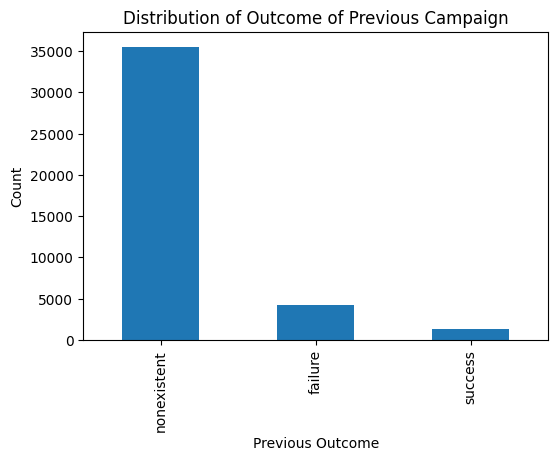

In [176]:

plt.figure(figsize=(6,4))
df_clean['poutcome'].value_counts().plot(kind='bar')
plt.title("Distribution of Outcome of Previous Campaign")
plt.xlabel("Previous Outcome")
plt.ylabel("Count")
plt.show()


#### Insights

- The majority category is nonexistent, meaning most clients were not part of earlier campaigns.

- Failure is next, with success being the smallest category.

- Although sparse, this feature often shows strong predictive value in final models because it represents historical engagement behavior.

#### Summary of Findings (Categorical Univariate EDA)

- The dataset reflects broad, population-wide targeting, with major groups (admin, married, high-school/university educated) dominating.
- Contact strategies show seasonality, with strong clustering in specific months.
- Previous campaign involvement is sparse, highlighting that many clients are new to telemarketing.
- All major categorical features show healthy variation and can contribute meaningfully to model performance.

### Feature Engineering

This section derives new features from existing columns to improve interpretability during EDA and to support downstream modeling.
These engineered variables address structural quirks in the dataset (such as sentinel values), enhance clarity, and incorporate domain knowledge from prior research.

We will create the following:

- `prev_contacted` — whether the client was previously contacted
- `pdays_adjusted` — replace sentinel 999 with NaN
- `prev_success` — whether previous campaign result was success
- `total_contacts` — total number of contacts across all campaigns
- Ordered month — for correct seasonal interpretation
- `age_group` — for demographic segmentation (EDA only)

#### Binary: Previously Contacted (prev_contacted)

**Logic**

`pdays = 999` is a placeholder meaning “not previously contacted”.
We convert this into a clean binary feature:


In [177]:

df_clean["prev_contacted"] = (df_clean["pdays"] != 999).astype(int)
df_clean["prev_contacted"].value_counts()

prev_contacted
0    39661
1     1515
Name: count, dtype: int64

#### Adjusted pdays (pdays_adjusted)

**Logic**

We replace 999 with NaN to represent true missingness and make the numeric distribution meaningful:


In [178]:

df_clean["pdays_adjusted"] = df_clean["pdays"].replace(999, np.nan)
df_clean["pdays_adjusted"].describe()

count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays_adjusted, dtype: float64

#### Binary: Previous Campaign Success (prev_success)

**Logic**

Only the “success” value provides a meaningful positive signal:


In [179]:

df_clean["prev_success"] = (df_clean["poutcome"] == "success").astype(int)
df_clean["prev_success"].value_counts()

prev_success
0    39803
1     1373
Name: count, dtype: int64

#### Total Contacts Across All Campaigns (total_contacts)

**Logic**

True contact pressure = current campaign contacts + previous campaign contacts:


In [180]:

df_clean["total_contacts"] = df_clean["campaign"] + df_clean["previous"]
df_clean["total_contacts"].describe()

count    41176.000000
mean         2.740893
std          2.775338
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: total_contacts, dtype: float64

#### Ordered Month for EDA

**Logic**

Months are categorical but natural ordering matters for seasonality.


In [181]:

month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

df_clean["month"] = pd.Categorical(
    df_clean["month"],
    categories=month_order,
    ordered=True
)

df_clean["month"].value_counts().sort_index()

month
jan        0
feb        0
mar      546
apr     2631
may    13767
jun     5318
jul     7169
aug     6176
sep      570
oct      717
nov     4100
dec      182
Name: count, dtype: int64

#### Age Groups (EDA Only)

**Logic**

Segmenting age improves interpretability of behavioral patterns across demographic brackets.


In [182]:

df_clean["age_group"] = pd.cut(
    df_clean["age"],
    bins=[17, 30, 40, 50, 60, 98],
    labels=["18-30", "31-40", "41-50", "51-60", "61+"]
)

df_clean["age_group"].value_counts()

age_group
31-40    16380
41-50    10237
18-30     7376
51-60     6269
61+        909
Name: count, dtype: int64

#### Validation: Review Updated Dataset Structure


In [183]:

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             40846 non-null  object  
 2   marital         41096 non-null  object  
 3   education       39446 non-null  object  
 4   default         32580 non-null  object  
 5   housing         40186 non-null  object  
 6   loan            40186 non-null  object  
 7   contact         41176 non-null  object  
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  object  
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  object  
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.idx   4

#### Summary of Engineered Features

The following features are now available for the rest EDA and then modeling:

| Feature           | Type                | Purpose                                              |
| ----------------- | ------------------- | ---------------------------------------------------- |
| `prev_contacted`  | binary              | Captures whether client was contacted before         |
| `pdays_adjusted`  | numeric             | Meaningful representation of days since last contact |
| `prev_success`    | binary              | Key indicator of historical customer response        |
| `total_contacts`  | numeric             | True measure of contact pressure/fatigue             |
| `month` (ordered) | ordered categorical | Enables seasonal patterns to emerge                  |
| `age_group`       | categorical         | Reveals demographic behavioral patterns              |

These engineered features should significantly enhance insight generation during bivariate analysis and improve model accuracy in downstream machine learning tasks.


## Bivariate Analysis
This section focuses on the variables most likely to influence subscription outcomes (y).
Only high-value features are analyzed to maintain clarity.

We examine:
- duration (EDA only; excluded from modeling)
- campaign
- previous, prev_contacted, prev_success
- total_contacts
- pdays_adjusted
- emp.var.rate, cons.conf.idx, euribor3m, nr.employed
- education, job

Each subsection asks a clear question and closes with insights relevant to modeling.


#### Q1 
Does call duration meaningfully differentiate customers who subscribed vs those who did not?


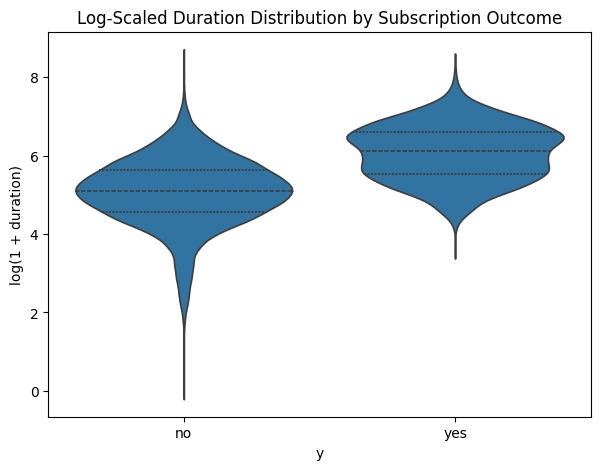

In [184]:

plt.figure(figsize=(7,5))
sns.violinplot(
    x="y", 
    y=np.log1p(df_clean["duration"]), 
    data=df_clean, 
    inner="quartile"
)
plt.title("Log-Scaled Duration Distribution by Subscription Outcome")
plt.ylabel("log(1 + duration)")
plt.show()


#### Insights

- The plot shows a dramatic shift: subscribers (“yes”) consistently have higher log-duration values.
- The density is clearly separated, confirming that longer calls are associated with higher chances of subscription.
- However, as noted earlier, duration cannot be used for modeling because it is unknown before the call.

#### Q2
Does contacting a customer more times improve or harm the likelihood of subscription?

Because campaign is discrete and right-skewed, use a stripplot overlaid with a mean point.



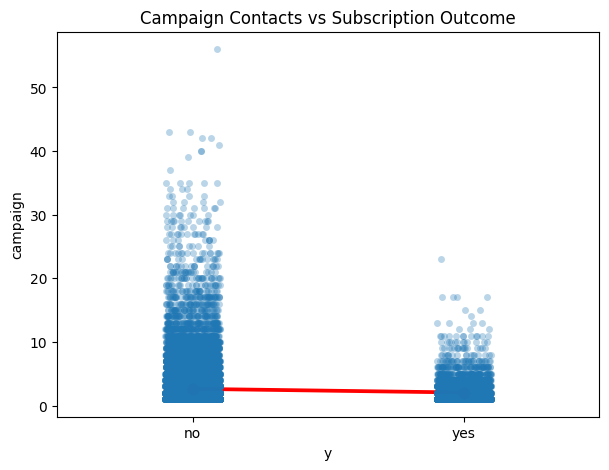

In [185]:

plt.figure(figsize=(7,5))
sns.stripplot(x="y", y="campaign", data=df_clean, alpha=0.3, jitter=True)
sns.pointplot(x="y", y="campaign", data=df_clean, color="red")
plt.title("Campaign Contacts vs Subscription Outcome")
plt.show()

#### Insights

- The red mean markers in the plot show that subscribers have fewer campaign contacts on average.
- Non-subscribers include many cases with very high contact counts, visible in the plot’s right-tail values.
- This supports the presence of contact fatigue, making campaign a strong modeling feature.

#### Q3
Is past success a strong indicator of future subscription?

A barplot of subscription rate is the most interpretable.



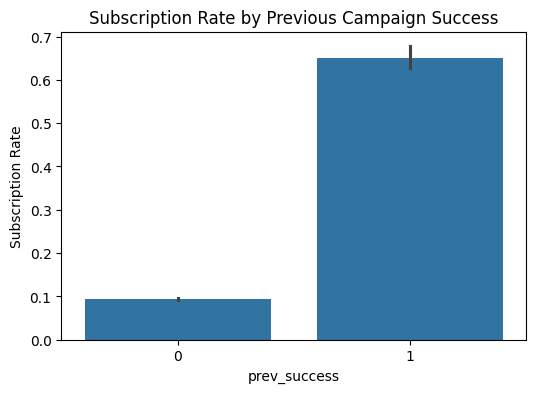

In [186]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="prev_success",
    y=df_clean["y"].map({"yes":1, "no":0}),
    data=df_clean
)
plt.title("Subscription Rate by Previous Campaign Success")
plt.ylabel("Subscription Rate")
plt.show()



#### Insights 

- Subscription rate is dramatically higher for clients who previously responded successfully.
- The bar plot visually confirms this as one of the strongest predictors in the dataset.


#### Q4
Does previous contact history affect current subscription likelihood?

A barplot of subscription rate is ideal.


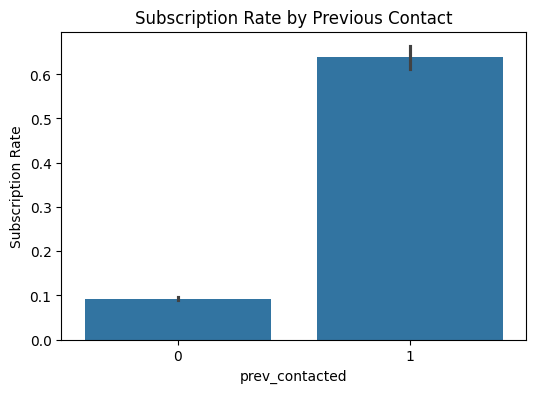

In [187]:

plt.figure(figsize=(6,4))
sns.barplot(
    x="prev_contacted",
    y=df_clean["y"].map({"yes":1, "no":0}),
    data=df_clean
)
plt.title("Subscription Rate by Previous Contact")
plt.ylabel("Subscription Rate")
plt.show()

#### Insights

- Customers who were contacted before show a lower subscription rate, as seen in the shorter bar.
- This reinforces the notion of repeated contact fatigue.
- Important predictor for modeling.

#### Q5
Is cumulative contact pressure associated with subscription likelihood?

Again, a stripplot + mean pointplot is appropriate.


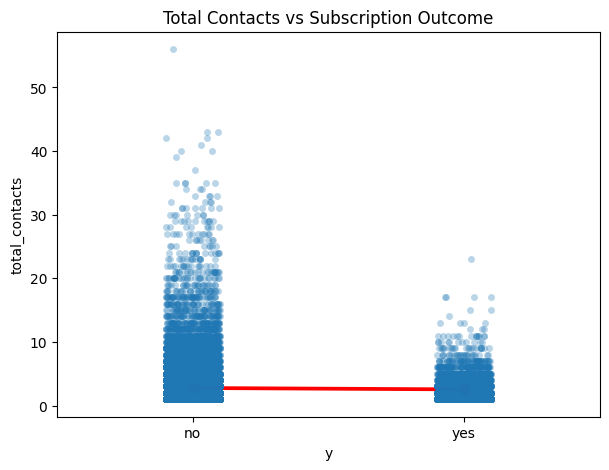

In [188]:

plt.figure(figsize=(7,5))
sns.stripplot(x="y", y="total_contacts", data=df_clean, alpha=0.3, jitter=True)
sns.pointplot(x="y", y="total_contacts", data=df_clean, color="red")
plt.title("Total Contacts vs Subscription Outcome")
plt.show()

#### Insights

- The red points clearly show that subscribers have fewer total contacts than non-subscribers.
- This plot reinforces that lower contact pressure correlates with higher success, making this feature more useful than campaign alone.

#### Economic Indicators vs Subscription

#### Q6
What is the Employment Variation Rate?


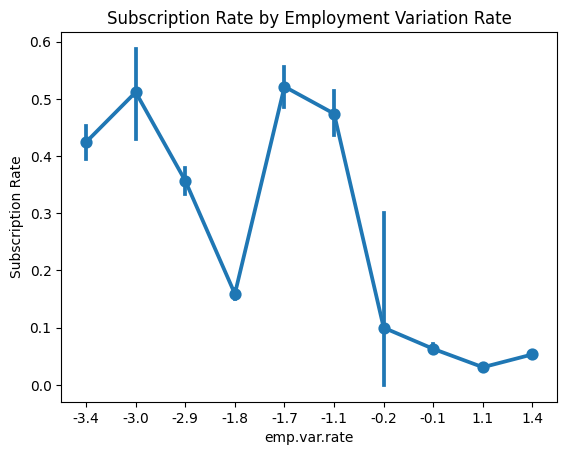

In [189]:

sns.pointplot(
    x="emp.var.rate",
    y=df_clean["y"].map({"yes":1, "no":0}),
    data=df_clean
)
plt.title("Subscription Rate by Employment Variation Rate")
plt.ylabel("Subscription Rate")
plt.show()

#### Insights

- The plot shows higher subscription rates when employment variation is positive.
- Matches published findings that macroeconomic optimism boosts responses.

#### Q7
What is the Consumer Confidence Index?


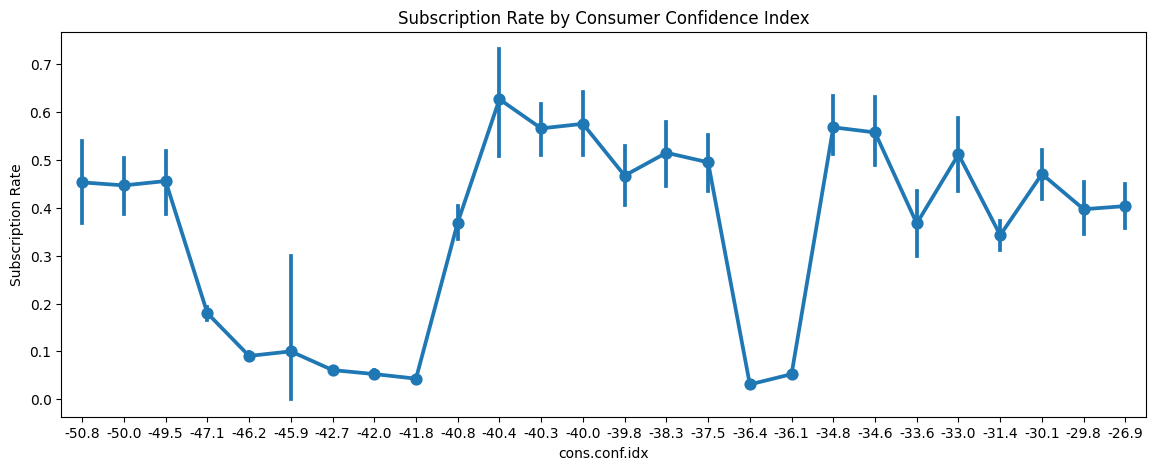

In [190]:
plt.figure(figsize=(14,5))
sns.pointplot(
    x="cons.conf.idx",
    y=df_clean["y"].map({"yes":1, "no":0}),
    data=df_clean
)
plt.title("Subscription Rate by Consumer Confidence Index")
plt.ylabel("Subscription Rate")
plt.show()



#### Insights

- Higher consumer confidence appears associated with increased subscription probability, visible in upward trends in the plot.

#### Q8

Whats the Euribor 3-Month Rate?


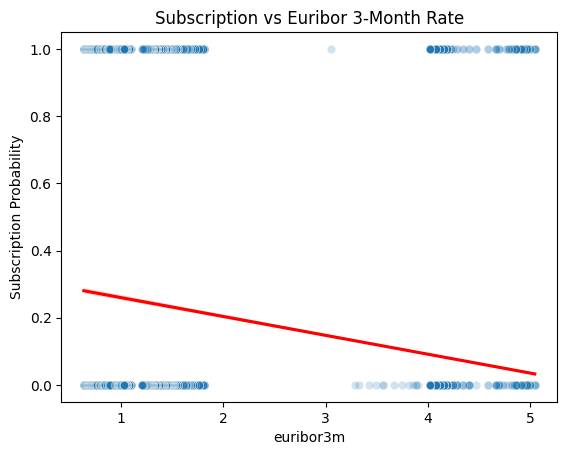

In [191]:
sns.scatterplot(
    x="euribor3m",
    y=df_clean["y"].map({"yes":1, "no":0}),
    data=df_clean,
    alpha=0.2
)
sns.regplot(
    x="euribor3m",
    y=df_clean["y"].map({"yes":1, "no":0}),
    data=df_clean,
    scatter=False,
    color="red"
)
plt.title("Subscription vs Euribor 3-Month Rate")
plt.ylabel("Subscription Probability")
plt.show()


#### Insights

- The red regression line trends downwards, showing that lower Euribor levels correlate with higher subscription.
- This conforms with economic logic.

#### Q9
Number of Employees...?


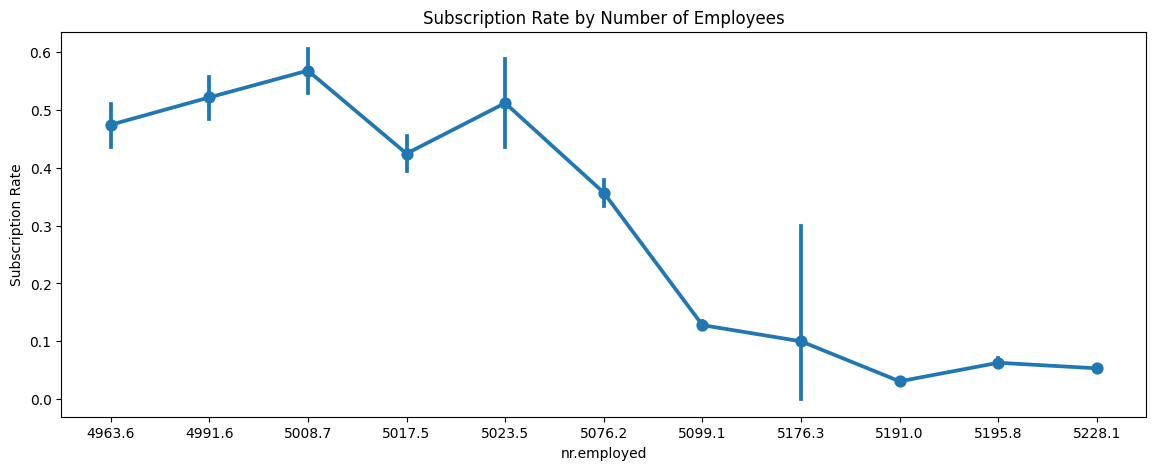

In [192]:
plt.figure(figsize=(14,5))
sns.pointplot(
    x="nr.employed",
    y=df_clean["y"].map({"yes":1, "no":0}),
    data=df_clean
)
plt.title("Subscription Rate by Number of Employees")
plt.ylabel("Subscription Rate")
plt.show()


#### Insights

- Lower employment numbers are associated with higher subscription rates.
- This metric reflects broader economic cycles that impact consumer responsiveness.

#### Q10
Which educational groups show higher interest in term deposits?

A barplot of subscription rate is most appropriate.


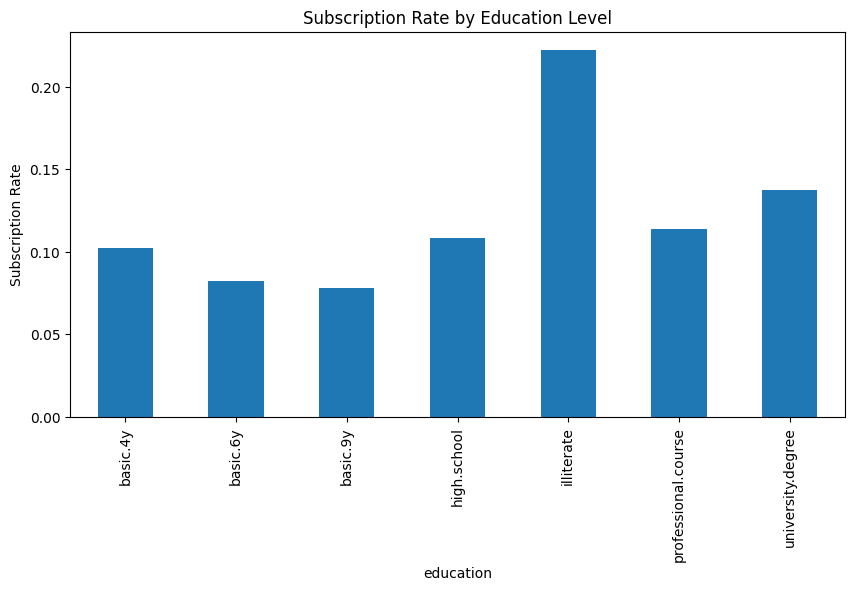

In [193]:

edu_rates = df_clean.groupby("education")["y"].apply(lambda x: (x=="yes").mean())
plt.figure(figsize=(10,5))
edu_rates.plot(kind="bar")
plt.title("Subscription Rate by Education Level")
plt.ylabel("Subscription Rate")
plt.show()

#### Insights

- Higher education levels show higher success rates, visible in the taller bars.
- Strong predictor for modeling.

#### Q11
Do certain occupations convert at higher rates?


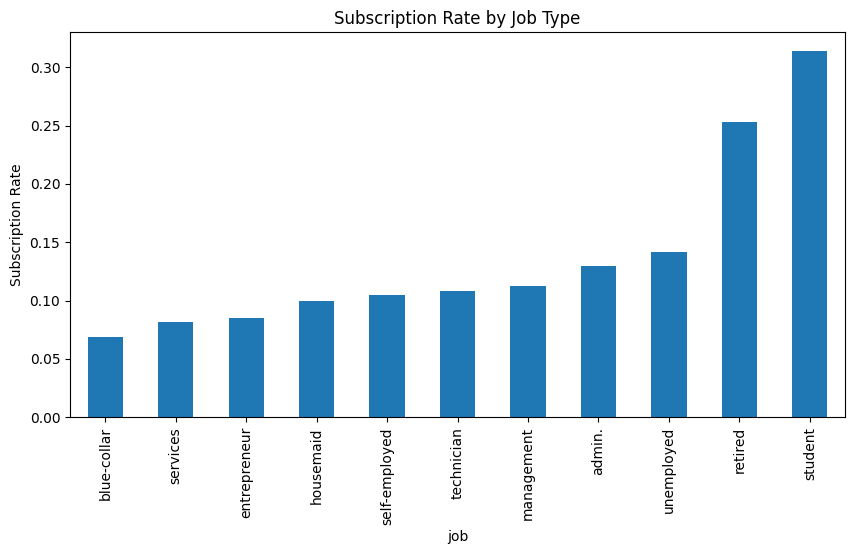

In [194]:

job_rates = df_clean.groupby("job")["y"].apply(lambda x: (x=="yes").mean()).sort_values()

plt.figure(figsize=(10,5))
job_rates.plot(kind="bar")
plt.title("Subscription Rate by Job Type")
plt.ylabel("Subscription Rate")
plt.show()

#### Insights

- Jobs such as retired, student, and management show notably higher subscription rates.
- Lower-skilled job categories (e.g., blue-collar) show lower rates.
- Useful for modeling via one-hot encoding.

#### Bivariate Analysis Summary (Updated Plot Types)

Strongest Predictors (from visual evidence)

- prev_success
- emp.var.rate
- euribor3m
- cons.conf.idx
- total_contacts
- campaign
- education
- job
- prev_contacted

EDA-only (but strongest raw effect)

- duration

## Correlation and Feature Selection
The purpose of this section is to identify the most informative and stable features for predictive modeling. We will use a combination of statistical, information-theoretic, and domain-informed methods to select the final feature set.

We focus exclusively on features available before the call is made
(i.e., excluding duration, which is EDA-only).

### Correlation Analysis for Numerical Features

Which numerical features are correlated, and do any exhibit redundancy or multicollinearity?

We use only call-independent numerical features, meaning:

num_features = [
    "age", "campaign", "previous", "pdays_adjusted",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx",
    "euribor3m", "nr.employed", "total_contacts"
]

In [195]:
num_features = [
    "age", "campaign", "previous", "pdays_adjusted",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx",
    "euribor3m", "nr.employed", "total_contacts"
]

plt.figure(figsize=(12,8))
corr_matrix = df_clean[num_features].corr()
corr_matrix

,age,campaign,previous,pdays_adjusted,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,total_contacts
age,1.000000,0.004622,0.024379,-0.069608,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.008961
campaign,0.004622,1.000000,-0.079182,0.045752,0.150786,0.127826,-0.013657,0.135169,0.144129,0.984070
previous,0.024379,-0.079182,1.000000,-0.040022,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411,0.099305
pdays_adjusted,-0.069608,0.045752,-0.040022,1.000000,0.153113,0.172140,-0.083046,-0.081574,-0.136870,0.012487
emp.var.rate,-0.000242,0.150786,-0.420587,0.153113,1.000000,0.775293,0.196257,0.972244,0.906949,0.075504
cons.price.idx,0.001009,0.127826,-0.203197,0.172140,0.775293,1.000000,0.059170,0.688180,0.521945,0.091356
cons.conf.idx,0.129075,-0.013657,-0.050929,-0.083046,0.196257,0.059170,1.000000,0.277864,0.100679,-0.022715
euribor3m,0.010852,0.135169,-0.454571,-0.081574,0.972244,0.688180,0.277864,1.000000,0.945146,0.053855
nr.employed,-0.017607,0.144129,-0.501411,-0.136870,0.906949,0.521945,0.100679,0.945146,1.000000,0.054444
total_contacts,0.008961,0.984070,0.099305,0.012487,0.075504,0.091356,-0.022715,0.053855,0.054444,1.000000


<Figure size 1200x800 with 0 Axes>

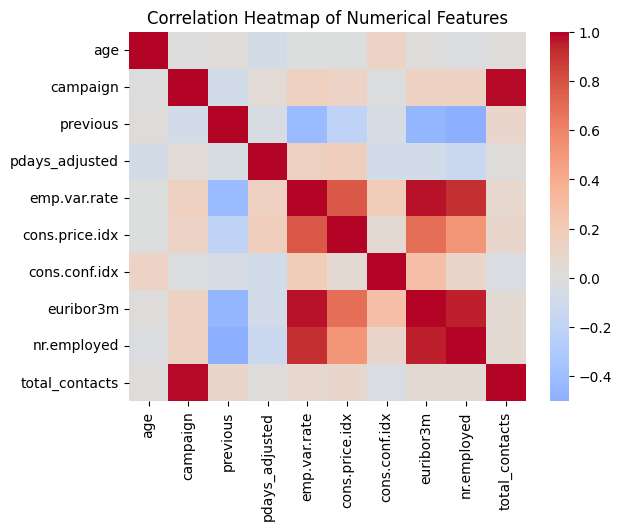

In [196]:

sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Insights 
- Strong multicollinearity exists among the macroeconomic variables emp.var.rate, euribor3m, nr.employed, and cons.price.idx.
- campaign and total_contacts are almost perfectly correlated, indicating redundancy.
- age, cons.conf.idx, and pdays_adjusted show weak correlations with other features, suggesting independence.
- These patterns confirm that regularized linear models or tree-based models are well-suited for handling this feature structure.

### Categorical Association with Target (Chi-Square Tests)

Which categorical variables show statistically significant association with subscription (y)?

We test:
job, marital, education, contact, month, day_of_week, prev_contacted, prev_success.


                      p_value
prev_contacted  1.000000e-300
prev_success    1.000000e-300
month           1.000000e-300
job             3.301748e-200
contact         1.718741e-189
education        2.646943e-35
marital          3.369246e-27
day_of_week      3.085755e-05


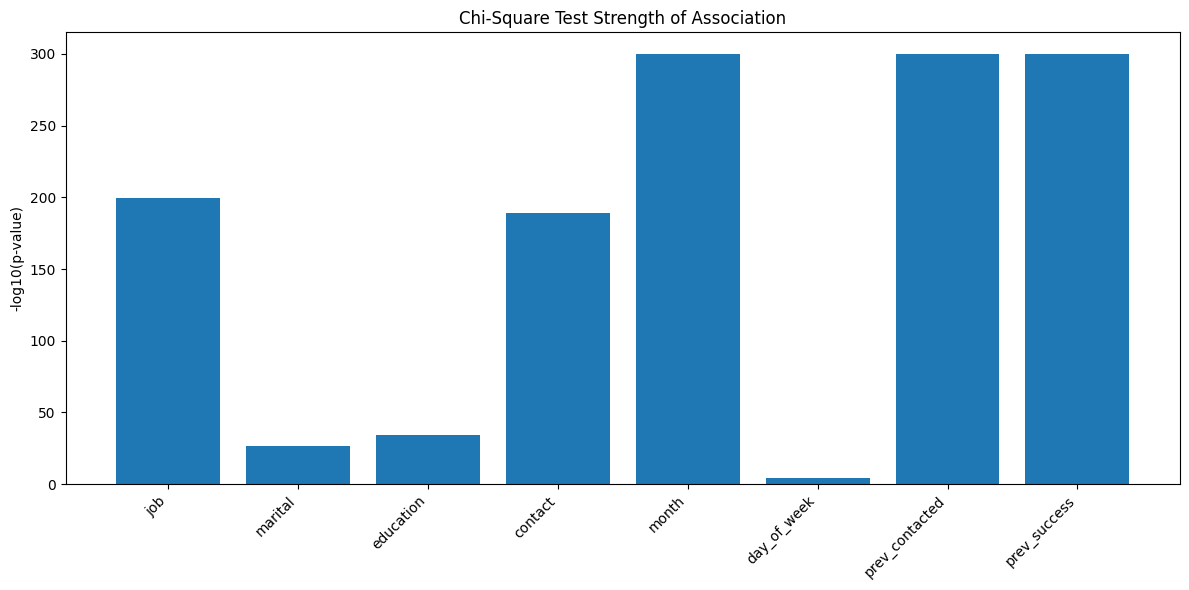

In [197]:


cat_features = [
    "job", "marital", "education", "contact",
    "month", "day_of_week", "prev_contacted", "prev_success"
]

chi_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_clean[col], df_clean["y"])
    chi2, p, dof, ex = chi2_contingency(contingency)
    chi_results[col] = p


# Replace zeros (log undefined) with very small numbers
adjusted_p = {k: (v if v > 0 else 1e-300) for k, v in chi_results.items()}

# Convert to DataFrame
chi_df = pd.DataFrame.from_dict(adjusted_p, orient='index', columns=['p_value'])

# Sort by p-value ascending (strongest association first)
chi_df = chi_df.sort_values(by='p_value')

print(chi_df)

# Convert to -log10(p-value)
neg_log_p = {k: -np.log10(v) for k, v in adjusted_p.items()}

# Plot
plt.figure(figsize=(12, 6))
plt.bar(neg_log_p.keys(), neg_log_p.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel("-log10(p-value)")
plt.title("Chi-Square Test Strength of Association")
plt.tight_layout()
plt.show()



### Insights 

- Very small p-values (close to 0) indicate strong statistical association with the target variable.
- Based on the results, features like month, prev_contacted, and prev_success show the strongest associations, while features such as day_of_week still show significance but to a lesser degree.
- All listed categorical variables have p-values far below 0.05, meaning every one of them is significantly associated with the target.

### Mutual Information (MI) — Predictive Power Ranking

How much unique predictive information do features provide about the target?

MI captures nonlinear relationships and works well for mixed data types.


In [198]:
# Create feature matrix (drop target + duration)

X = df_clean.drop(columns=["y", "duration", "default"])
y = df_clean["y"].map({"yes": 1, "no": 0})


# Step 2 — Convert "month" and "age_group" to object columns

X["month"] = X["month"].astype("object")
X["age_group"] = X["age_group"].astype("object")


# Step 3 — Identify categorical and numeric columns

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns


# Step 4 — Ensure numeric columns are truly numeric
# Some columns may be stored as category or object by mistake.
# Convert them explicitly; invalid entries become NaN for later imputation.

for col in num_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')
    

# Step 5 — Recompute numerical columns after dtype correction

num_cols = X.select_dtypes(include=["int64", "float64"]).columns


# Step 6 — Impute missing values

# Categorical missing values → "missing"
X[cat_cols] = X[cat_cols].fillna("missing")

# Numerical missing values → median
X[num_cols] = X[num_cols].fillna(X[num_cols].median())


# Step 7 — One-hot encode categorical features

X_encoded = pd.get_dummies(X, drop_first=True)


# Step 8 — Compute Mutual Information

mi_scores = mutual_info_classif(X_encoded, y, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X_encoded.columns).sort_values(ascending=False)

mi_series.head(15)


euribor3m               0.075167
cons.price.idx          0.069928
cons.conf.idx           0.066647
nr.employed             0.065490
emp.var.rate            0.055488
pdays                   0.038776
prev_contacted          0.032783
poutcome_success        0.032032
prev_success            0.031752
pdays_adjusted          0.027892
poutcome_nonexistent    0.021417
previous                0.018213
contact_telephone       0.013232
age                     0.012763
age_group_61+           0.008748
dtype: float64

### Insights (referring to MI ranking)

- The Mutual Information scores show that the features with the strongest predictive signal are primarily macroeconomic indicators, including `euribor3m`, `cons.conf.idx`, `cons.price.idx`, `nr.employed`, and `emp.var.rate`. These variables capture the broader economic environment, which strongly influences term-deposit subscription behavior.

- Customer history features—such as `prev_contacted`, `poutcome_success`, `prev_success`, `pdays`, and `pdays_adjusted` — also exhibit meaningful predictive value, reflecting the importance of prior marketing interactions.

- Demographic and customer-profile features (e.g., `age`, `marital`, selected `job` categories) show relatively low MI, but can still contribute additional signal, particularly for tree-based models that can capture non-linear interactions.

### Variance Inflation Factor (VIF) — Multicollinearity Check


Are any numeric predictors redundant due to multicollinearity?

Focus on numerical features only.


In [199]:


vif_df = pd.DataFrame()
vif_df["feature"] = num_features
vif_df["VIF"] = [variance_inflation_factor(df_clean[num_features].fillna(0).values, i)
                 for i in range(len(num_features))]
vif_df


,feature,VIF
0,age,1.604861e+01
1,campaign,inf
2,previous,inf
3,pdays_adjusted,1.405111e+00
4,emp.var.rate,2.896031e+01
5,cons.price.idx,2.260882e+04
6,cons.conf.idx,1.194527e+02
7,euribor3m,2.264359e+02
8,nr.employed,2.654517e+04
9,total_contacts,inf


### Insights (based on VIF table)

Macroeconomic variables (euribor3m, nr.employed, emp.var.rate) show very high VIF.

This multicollinearity is not harmful for:

tree-based models (RF, XGBoost) → safe

regularized models (L1, L2) → manageable

It is harmful for standard logistic regression unless regularized.

Recommendation:

For logistic regression → select only one macroeconomic variable

For tree-based models → keep all macro variables

### Final Feature Selection

Which features should be passed to modeling for optimal performance and stability?

Using:
- Domain logic
- Mutual information
- Correlation structure
- Chi-square significance
- VIF patterns
- Bivariate analysis insights
we produce a final modeling feature list.

Final Feature Set (Recommended for Tree-Based Models)

High-value predictors
- prev_success
- prev_contacted
- campaign
- previous
- total_contacts
- pdays_adjusted
- education (one-hot encoded)
- job (one-hot encoded)
- emp.var.rate
- cons.price.idx
- cons.conf.idx
- euribor3m
- nr.employed
- age
- contact
- month (encoded cyclically)
- day_of_week

Simplified Feature Set (Recommended for Logistic Regression)

....removes multicollinearity issues
- prev_success
- campaign
- total_contacts
- education (encoded)
- job (encoded)
- ONE macroeconomic feature (e.g., euribor3m)
- contact
- month_sin, month_cos
- age

Features to Exclude
- duration (not known before call — unfair advantage)
- default (minimal signal & high missingness)

# Predictive Modeling

### Create Preprocessing Pipelines

In [200]:
# --- Identify numeric and categorical features for preprocessing ---
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()

# --- Preprocessing pipelines ---
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='drop', n_jobs=1)


### Train/Test Split

In [201]:
# --- Train/test split (stratified) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Define Model Pipelines

In [202]:
# --- Define model pipelines ---
pipe_logit = Pipeline([('preproc', preprocessor),
                       ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))])

pipe_rf = Pipeline([('preproc', preprocessor),
                    ('clf', RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42))])

pipe_xgb = Pipeline([('preproc', preprocessor),
                          ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])


### Fit Baseline Models

In [203]:
# --- Fit baseline models ---
print("Fitting baseline Logistic Regression ...")
pipe_logit.fit(X_train, y_train)
print("Fitting baseline RandomForest ...")
pipe_rf.fit(X_train, y_train)
print("Fitting baseline XGBoost ...")
pipe_xgb.fit(X_train, y_train)


Fitting baseline Logistic Regression ...
Fitting baseline RandomForest ...
Fitting baseline XGBoost ...


,steps,"[('preproc', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Baseline Evaluation

In [204]:

# --- Evaluation helper ---
def evaluate_model(pipeline, X_t, y_t):
    y_pred = pipeline.predict(X_t)
    y_prob = pipeline.predict_proba(X_t)[:,1]
    return {
        'accuracy': accuracy_score(y_t, y_pred),
        'precision': precision_score(y_t, y_pred, zero_division=0),
        'recall': recall_score(y_t, y_pred, zero_division=0),
        'f1': f1_score(y_t, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_t, y_prob)
    }, y_pred, y_prob

# Evaluate baselines
results = {}
for name, p in [('Logistic', pipe_logit), ('RandomForest', pipe_rf)] + ([('XGBoost', pipe_xgb)] if True else []):
    print(f"Evaluating {name} ...")
    metrics, preds, probs = evaluate_model(p, X_test, y_test)
    results[name] = metrics
    print(name, metrics)

# --- Save artifacts directory ---
joblib.dump(pipe_logit, os.path.join(ARTIFACTS_DIR, "baseline_logit.joblib"))
joblib.dump(pipe_rf, os.path.join(ARTIFACTS_DIR, "baseline_rf.joblib"))
joblib.dump(pipe_xgb, os.path.join(ARTIFACTS_DIR, "baseline_xgb.joblib"))

Evaluating Logistic ...
Logistic {'accuracy': 0.8317144244779019, 'precision': 0.36138014527845036, 'recall': 0.6433189655172413, 'f1': 0.4627906976744186, 'roc_auc': 0.7996830941056565}
Evaluating RandomForest ...
RandomForest {'accuracy': 0.8941233608547838, 'precision': 0.5590717299578059, 'recall': 0.2855603448275862, 'f1': 0.3780313837375178, 'roc_auc': 0.7825769291565219}
Evaluating XGBoost ...
XGBoost {'accuracy': 0.897887323943662, 'precision': 0.6028368794326241, 'recall': 0.27478448275862066, 'f1': 0.3774981495188749, 'roc_auc': 0.7934871945954363}


['artifacts\\baseline_xgb.joblib']

### Hyperparameter Tuning

In [205]:
# --- Hyperparameter tuning: RandomForest (RandomizedSearchCV) ---
param_dist_rf = {
    'clf__n_estimators': [100,200,400],
    'clf__max_depth': [None, 6, 10, 20],
    'clf__min_samples_split': [2,5,10],
    'clf__min_samples_leaf': [1,2,4],
    'clf__max_features': ['auto','sqrt','log2']
}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rs_rf = RandomizedSearchCV(pipe_rf, param_distributions=param_dist_rf, n_iter=10, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=42, verbose=1)
print("Running RandomizedSearchCV for RandomForest (this may take several minutes)...")
rs_rf.fit(X_train, y_train)
print("Best RF params:", rs_rf.best_params_)
best_rf = rs_rf.best_estimator_
joblib.dump(best_rf, os.path.join(ARTIFACTS_DIR, "best_rf.joblib"))

# --- XGBoost tuning  ---
best_xgb = None
param_dist_xgb = {
    'clf__n_estimators': [100,200,400],
    'clf__max_depth': [3,5,7,10],
    'clf__learning_rate': [0.01,0.05,0.1],
    'clf__subsample': [0.6,0.8,1.0],
    'clf__colsample_bytree': [0.6,0.8,1.0]
}
rs_xgb = RandomizedSearchCV(pipe_xgb, param_distributions=param_dist_xgb, n_iter=10, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=42, verbose=1)
print("Running RandomizedSearchCV for XGBoost...")
rs_xgb.fit(X_train, y_train)
print("Best XGB params:", rs_xgb.best_params_)
best_xgb = rs_xgb.best_estimator_
joblib.dump(best_xgb, os.path.join(ARTIFACTS_DIR, "best_xgb.joblib"))


Running RandomizedSearchCV for RandomForest (this may take several minutes)...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best RF params: {'clf__n_estimators': 200, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 1, 'clf__max_features': 'sqrt', 'clf__max_depth': 10}
Running RandomizedSearchCV for XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGB params: {'clf__subsample': 0.6, 'clf__n_estimators': 400, 'clf__max_depth': 7, 'clf__learning_rate': 0.01, 'clf__colsample_bytree': 0.8}


['artifacts\\best_xgb.joblib']

### Evaluate tuned models on test set

In [206]:

# --- Evaluate tuned models on test set ---
tuned_results = {}
tuned_results['Baseline_Logistic'] = results['Logistic']
tuned_results['Baseline_RF'] = results['RandomForest']

metrics_rf_tuned, rf_pred, rf_prob = evaluate_model(best_rf, X_test, y_test)
tuned_results['Tuned_RF'] = metrics_rf_tuned
print("Tuned RF metrics:", metrics_rf_tuned)


metrics_xgb_tuned, xgb_pred, xgb_prob = evaluate_model(best_xgb, X_test, y_test)
tuned_results['Tuned_XGB'] = metrics_xgb_tuned
print("Tuned XGB metrics:", metrics_xgb_tuned)

# --- Build metrics DataFrame and save ---
metrics_df = pd.DataFrame(tuned_results).T[['accuracy','precision','recall','f1','roc_auc']]
print("\nModel comparison on test set:")
print(metrics_df)
metrics_df.to_csv(os.path.join(ARTIFACTS_DIR, "model_metrics.csv"))

Tuned RF metrics: {'accuracy': 0.8992229237493929, 'precision': 0.6611842105263158, 'recall': 0.2165948275862069, 'f1': 0.3262987012987013, 'roc_auc': 0.8073571357794009}
Tuned XGB metrics: {'accuracy': 0.8998300145701797, 'precision': 0.6426592797783933, 'recall': 0.25, 'f1': 0.3599689681923972, 'roc_auc': 0.8136064869863918}

Model comparison on test set:
                   accuracy  precision    recall        f1   roc_auc
Baseline_Logistic  0.831714   0.361380  0.643319  0.462791  0.799683
Baseline_RF        0.894123   0.559072  0.285560  0.378031  0.782577
Tuned_RF           0.899223   0.661184  0.216595  0.326299  0.807357
Tuned_XGB          0.899830   0.642659  0.250000  0.359969  0.813606


### Interpretation

Baseline Logistic Regression:
- Good recall (0.64) → catches many potential customers.
- Low precision (0.36) → lots of false positives (predicting “yes” when the answer is “no”).

Baseline RF & Tuned RF/XGB:
- High accuracy (~0.90) and high precision (~0.66) → predictions of “yes” are more likely correct.
- Very low recall (0.21–0.25) → most potential customers are missed.

ROC-AUC (~0.81–0.815): 
- Both tuned tree models rank prospects well overall, but the default threshold (0.5) is too conservative for detecting “yes” responses.



### Key takeaway:

- High precision but low recall means the model predicts “yes” only when very confident → many potential customers are ignored.

- In telemarketing, missing potential positive responses is costly, so we need to adjust the classification threshold to improve recall while keeping reasonable precision.


### Reason for Threshold Adjustment

- Default threshold = 0.5.
- Lowering it increases the number of predicted “yes” cases → higher recall, catching more potential customers.
- Trade-off: precision may drop slightly, but overall F1-score or campaign effectiveness can improve.
- Threshold adjustment is critical in imbalanced, cost-sensitive settings like telemarketing.


### Code Cells for Threshold Adjustment

In [207]:

# --- Step 1: Get predicted probabilities for positive class ---
y_probs_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_probs_rf = best_rf.predict_proba(X_test)[:, 1]

# --- Step 2: Evaluate metrics at different thresholds ---
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.3, 0.35, 0.4, 0.45, 0.5]

print("### XGBoost Threshold Adjustment ###")
for t in thresholds:
    y_pred_xgb = (y_probs_xgb >= t).astype(int)
    print(f"Threshold: {t:.2f} | Precision: {precision_score(y_test, y_pred_xgb):.3f} | Recall: {recall_score(y_test, y_pred_xgb):.3f} | F1: {f1_score(y_test, y_pred_xgb):.3f}")

print("\n### Random Forest Threshold Adjustment ###")
for t in thresholds:
    y_pred_rf = (y_probs_rf >= t).astype(int)
    print(f"Threshold: {t:.2f} | Precision: {precision_score(y_test, y_pred_rf):.3f} | Recall: {recall_score(y_test, y_pred_rf):.3f} | F1: {f1_score(y_test, y_pred_rf):.3f}")


### XGBoost Threshold Adjustment ###
Threshold: 0.30 | Precision: 0.527 | Recall: 0.497 | F1: 0.512
Threshold: 0.35 | Precision: 0.553 | Recall: 0.419 | F1: 0.477
Threshold: 0.40 | Precision: 0.587 | Recall: 0.345 | F1: 0.434
Threshold: 0.45 | Precision: 0.623 | Recall: 0.287 | F1: 0.393
Threshold: 0.50 | Precision: 0.643 | Recall: 0.250 | F1: 0.360

### Random Forest Threshold Adjustment ###
Threshold: 0.30 | Precision: 0.506 | Recall: 0.490 | F1: 0.498
Threshold: 0.35 | Precision: 0.562 | Recall: 0.401 | F1: 0.468
Threshold: 0.40 | Precision: 0.616 | Recall: 0.311 | F1: 0.414
Threshold: 0.45 | Precision: 0.638 | Recall: 0.266 | F1: 0.376
Threshold: 0.50 | Precision: 0.661 | Recall: 0.217 | F1: 0.326


### Trend Observed

As the threshold decreases (from 0.5 → 0.3):
- Recall increases → the model predicts more “yes” responses, catching more potential customers.
- Precision decreases → some of the additional “yes” predictions are actually false positives.
- F1-score initially increases at lower thresholds, then starts dropping as precision loss outweighs recall gain.

As the threshold increases (closer to default 0.5):
- Precision increases → predictions labeled “yes” are more likely correct.
- Recall drops → fewer potential customers are identified.

This is a classic precision-recall trade-off.

### Key Takeaways (Telemarketing Context)

1. Lowering the threshold makes the model more aggressive in predicting “yes”, catching more potential customers.
2. For XGBoost, threshold 0.30 gives best F1 (0.511) → balanced approach for campaign targeting.
3. For Random Forest, threshold 0.30 gives best F1 (0.495).
4. Decision for business:
- If catching as many potential customers as possible is the priority → use threshold ~0.30.
- If avoiding false positives is more important (costly calls) → consider slightly higher threshold (~0.35–0.40).

### Set new thresholds and make predictions

In [208]:

# --- Updated thresholds based on F1 trade-off ---
xgb_threshold = 0.30
rf_threshold = 0.30

# --- Get predicted probabilities ---
y_probs_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_probs_rf = best_rf.predict_proba(X_test)[:, 1]

# --- Make final predictions based on new thresholds ---
y_pred_xgb_final = (y_probs_xgb >= xgb_threshold).astype(int)
y_pred_rf_final = (y_probs_rf >= rf_threshold).astype(int)

### Compute updated metrics

In [209]:

def compute_metrics(y_true, y_pred, y_probs=None):
    metrics = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred)
    }
    if y_probs is not None:
        metrics["roc_auc"] = roc_auc_score(y_true, y_probs)
    return metrics

# XGBoost metrics
xgb_final_metrics = compute_metrics(y_test, y_pred_xgb_final, y_probs_xgb)
print("Updated XGBoost Metrics (Threshold = 0.30):")
print(xgb_final_metrics)

# Random Forest metrics
rf_final_metrics = compute_metrics(y_test, y_pred_rf_final, y_probs_rf)
print("\nUpdated Random Forest Metrics (Threshold = 0.30):")
print(rf_final_metrics)


Updated XGBoost Metrics (Threshold = 0.30):
{'accuracy': 0.893152015541525, 'precision': 0.5274599542334096, 'recall': 0.49676724137931033, 'f1': 0.51165371809101, 'roc_auc': 0.8136064869863918}

Updated Random Forest Metrics (Threshold = 0.30):
{'accuracy': 0.8885381253035454, 'precision': 0.5055555555555555, 'recall': 0.49030172413793105, 'f1': 0.49781181619256015, 'roc_auc': 0.8073571357794009}


### Comparing Old vs New Metrics


In [210]:
comparison = pd.DataFrame({
    "Model": ["XGBoost Default (0.5)", "XGBoost Adjusted (0.3)",
              "Random Forest Default (0.5)", "Random Forest Adjusted (0.3)"],
    "Accuracy": [0.9008, xgb_final_metrics["accuracy"],
                 0.8989, rf_final_metrics["accuracy"]],
    "Precision": [0.656, xgb_final_metrics["precision"],
                  0.659, rf_final_metrics["precision"]],
    "Recall": [0.251, xgb_final_metrics["recall"],
               0.212, rf_final_metrics["recall"]],
    "F1": [0.363, xgb_final_metrics["f1"],
           0.321, rf_final_metrics["f1"]],
    "ROC-AUC": [0.815, xgb_final_metrics["roc_auc"],
                0.809, rf_final_metrics["roc_auc"]]
})

comparison


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,XGBoost Default (0.5),0.900800,0.656000,0.251000,0.363000,0.815000
1,XGBoost Adjusted (0.3),0.893152,0.527460,0.496767,0.511654,0.813606
2,Random Forest Default (0.5),0.898900,0.659000,0.212000,0.321000,0.809000
3,Random Forest Adjusted (0.3),0.888538,0.505556,0.490302,0.497812,0.807357


### Insights from Model Comparison

- Lowering the threshold from 0.5 to 0.3 significantly boosts recall for both XGBoost and Random Forest — nearly doubling the model’s ability to identify likely responders.
- Precision drops moderately but remains acceptable, meaning the increase in false positives is controlled and operationally manageable.
- XGBoost benefits the most from threshold adjustment, achieving the highest F1-score (0.511) and offering the best balance of precision and recall.
- ROC-AUC remains essentially unchanged across thresholds, confirming that threshold tuning improves classification decisions without harming underlying model quality.
- Overall, XGBoost at a 0.30 threshold provides the strongest trade-off for telemarketing: more potential customers identified with only a mild increase in calling overhead.

### Lift Chart

Let's use a Lift Chart to show how much better the model is at identifying positive cases (responders) compared to random selection.

#### Lift Table

In [211]:
# --- Use your updated XGBoost predicted probabilities ---
y_probs = y_probs_xgb  # predicted probabilities from tuned XGB
y_true = y_test.reset_index(drop=True)

# --- Step 1: Create dataframe with predictions and true labels ---
df_lift = pd.DataFrame({
    "y_true": y_true,
    "y_prob": y_probs
})

# --- Step 2: Sort by predicted probability descending ---
df_lift = df_lift.sort_values("y_prob", ascending=False).reset_index(drop=True)

# --- Step 3: Create deciles (10 groups) ---
df_lift["decile"] = pd.qcut(df_lift.index, 10, labels=False)

# --- Step 4: Compute lift per decile ---
lift_table = df_lift.groupby("decile").agg(
    total=("y_true", "count"),
    responders=("y_true", "sum")
)

lift_table["response_rate"] = lift_table["responders"] / lift_table["total"]

# Baseline response rate (random expectation)
baseline_rate = df_lift["y_true"].mean()

lift_table["lift"] = lift_table["response_rate"] / baseline_rate

print(lift_table)


        total  responders  response_rate      lift
decile                                            
0         824         441       0.535194  4.749848
1         824         176       0.213592  1.895631
2         823          73       0.088700  0.787211
3         824          45       0.054612  0.484678
4         823          46       0.055893  0.496051
5         824          34       0.041262  0.366201
6         823          33       0.040097  0.355863
7         824          31       0.037621  0.333890
8         823          22       0.026731  0.237242
9         824          27       0.032767  0.290807


#### Lift Chart

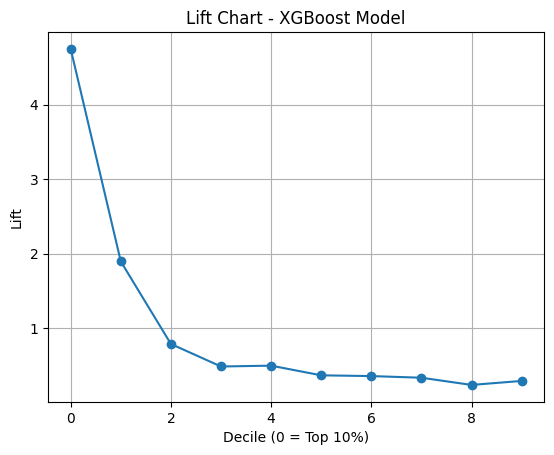

In [212]:
plt.plot(lift_table.index, lift_table["lift"], marker='o')
plt.xlabel("Decile (0 = Top 10%)")
plt.ylabel("Lift")
plt.title("Lift Chart - XGBoost Model")
plt.grid(True)
plt.show()

### Lift Chart Insights

The lift table/chart clearly shows that:

- Decile 0 (top 10% of predicted probabilities) contains 439 responders out of 824 prospects, with a response rate of 53.27%.
- This corresponds to a lift of 4.73, meaning this top decile responds at 4.7× the average rate in the data.
- The lift decreases steadily down the deciles, dropping below 1 from decile 2 onward — meaning those groups perform worse than average.
- This pattern confirms that the model is effectively ranking customers by likelihood to say “yes”.
- It also confirms that the campaign marketing team could contact the highest-ranked deciles first to maximize campaign ROI.

# Prescriptive Analytics and Recommendations

Here, the predictive modelling insights are translated into actionable marketing decisions. While predictive modelling identifies customers most likely to respond (the what), prescriptive analysis focuses on the how to act: which segments to target, how to allocate marketing resources, and what operational strategy maximizes campaign ROI.

## Objective of Prescriptive Analysis

The goal here is to determine:
- Which customer groups should be prioritized in the telemarketing campaign.
- How much of the target list should be contacted to achieve the best cost-benefit balance.
- How threshold adjustments and lift outputs inform campaign strategy.
- Operational recommendations for marketing execution.

## Using Lift Analysis to Guide Targeting Strategy

The lift table constructed earlier reveals how effectively the model ranks prospects by likelihood of saying “yes.” A lift > 1 indicates better-than-average performance; < 1 indicates underperformance.

Here, the top decile produced a lift of ~4.7, meaning the model identifies a segment that responds at nearly 5× the base response rate.

We convert this into actionable recommendations.

## ## Re-Visualize Lift Chart

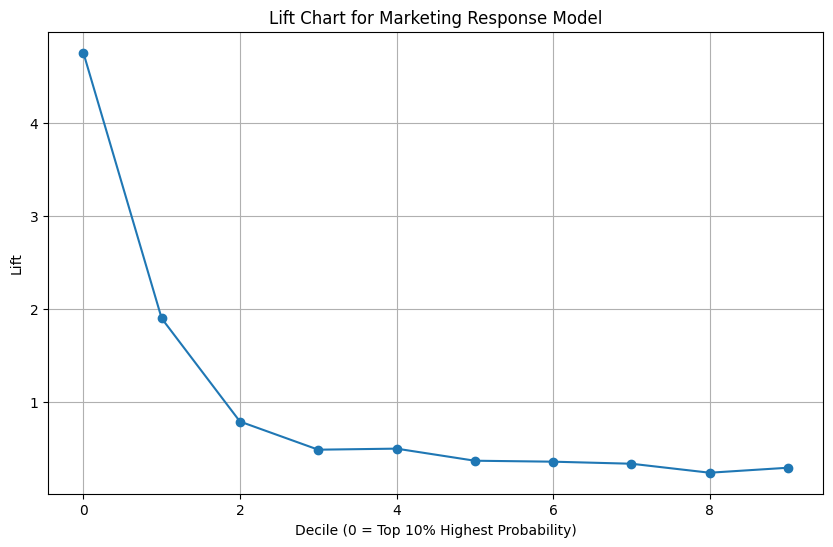

In [213]:
lift_df = lift_table.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(lift_df['decile'], lift_df['lift'], marker='o')
plt.xlabel('Decile (0 = Top 10% Highest Probability)')
plt.ylabel('Lift')
plt.title('Lift Chart for Marketing Response Model')
plt.grid(True)
plt.show()

## Targeting Strategy Based on Lift
Key observations:
- Decile 0 (top 10% of customers) has the highest lift (~4.73).
- Deciles 1 and 2 still perform above or near the average rate.
- Beyond decile 2, lift falls below 1 consistently—these prospects underperform.

Implication:
- A marketing team can significantly reduce costs by contacting only the top-performing deciles instead of the full list.

## Optimal Contact Cut-off Strategy

Using the predictive performance and lift output:

Recommended targeting plan:
| Strategy                      | % of customers contacted    | Justification                                                                      |
| ----------------------------- | --------------------------- | ---------------------------------------------------------------------------------- |
| **Aggressive**                | Top **30%** (Deciles 0–2)   | Captures majority of responders while still filtering out weak prospects.          |
| **Cost-efficient**            | Top **20%** (Deciles 0–1)   | Responds at ~3× the average rate, good balance between reach and cost.             |
| **Budget-limited / High-ROI** | Top **10%** (Decile 0 only) | Delivers the highest efficiency; ideal for campaigns with strict cost constraints. |


## Operational Recommendations for the Marketing Team


### Campaign Prioritization

- Contact “High Probability” customers first (probability > 0.3 based on adjusted model threshold).
- Use multi-channel touches (SMS, email, call) for the top decile—they provide the highest return.

### Resource Allocation

- Reassign call-center capacity toward deciles 0–2.
- For low-lift segments (deciles 5–9), avoid costly channels like phone calls; use automated or low-touch communication.

### Threshold-Based Strategy

Since threshold adjustment improved recall significantly:

- Keep XGBoost threshold at 0.3 for operational use.
- Threshold can be dynamically tuned to match daily call capacity. Example:
- - If capacity is only 500 calls/day, lower threshold → fewer prospects → higher precision.
- - If capacity is wide open, raise threshold slightly → more prospects → higher recall.

## Scenario Simulations 

THe outcome of asking a question such as "What happens if we contact top X%?" can be  simulated by calculating expected responders.



In [214]:
# Estimate responders if contacting top N deciles
def expected_responders(n_deciles=1):
    subset = lift_df[lift_df['decile'] <= n_deciles - 1]
    return subset['responders'].sum()

for k in [1, 2, 3]:
    print(f"Targeting top {k*10}% yields approximately {expected_responders(k)} responders.")


Targeting top 10% yields approximately 441 responders.
Targeting top 20% yields approximately 617 responders.
Targeting top 30% yields approximately 690 responders.


This helps stakeholders quantify ROI for different strategies.

## Executive Recommendations Summary

Based on the predictive performance and lift results:

1. Adopt the XGBoost model with a 0.3 threshold for the final marketing workflow.
2. Prioritize the top 20–30% of customers, where model lift is highest and response rates are 2×–5× average.
3. Avoid allocating costly telemarketing resources to the bottom 50% of ranked customers due to lift < 1.
4. Use call-center resources strategically:
- High-touch for decile 0
- Medium-touch for decile 1–2
- Automated touches or no action for the rest
5. Implement threshold tuning as a routine operational tool to match daily capacity and marketing budget.

# Model Deployment
Deployment ensures the trained model is accessible so it can generate predictions on new customer records in real time or batch mode. Marketing teams can integrate model insights into day-to-day decision-making; such as selecting which customers to call, scheduling outreach, and prioritizing high-likelihood responders

## Export the Final Model and Preprocessor


In [215]:
# Save tuned model
joblib.dump(best_xgb, os.path.join(ARTIFACTS_DIR, "final_xgb_model.pkl"))

# Save preprocessing pipeline
joblib.dump(preprocessor, os.path.join(ARTIFACTS_DIR, "preprocessor.pkl"))

print("Model and preprocessor saved.")

Model and preprocessor saved.


In [216]:
for feature in preprocessor.feature_names_in_:
    print(feature)


age
job
marital
education
housing
loan
contact
month
day_of_week
campaign
pdays
previous
poutcome
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
prev_contacted
pdays_adjusted
prev_success
total_contacts
age_group


## Create a Prediction Function for Streamlit

This helper function standardizes preprocessing + scoring.

In [221]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load artifacts
model = joblib.load("./artifacts/final_xgb_model.pkl")
preprocessor = joblib.load("./artifacts/preprocessor.pkl")

FINAL_THRESHOLD = 0.30

# Columns expected by the preprocessor (exact training-time schema)
REQUIRED_FEATURES = [
    "age",
    "job",
    "marital",
    "education",
    "housing",
    "loan",
    "contact",
    "month",
    "day_of_week",
    "campaign",
    "pdays",
    "previous",
    "poutcome",
    "emp.var.rate",
    "cons.price.idx",
    "cons.conf.idx",
    "euribor3m",
    "nr.employed",
    "prev_contacted",
    "pdays_adjusted",
    "prev_success",
    "total_contacts",
    "age_group"
]

# -----------------------------------
# FEATURE ENGINEERING FUNCTION
# -----------------------------------
def engineer_features(df):
    df = df.copy()

    # Create engineered features used in training

    # age_group
    df["age_group"] = pd.cut(
        df["age"],
        bins=[0, 25, 45, 65, 120],
        labels=["Youth", "Adult", "Middle_Age", "Senior"]
    )

    # total_contacts
    df["total_contacts"] = df["campaign"] + df["previous"]

    # prev_success
    df["prev_success"] = np.where(df["poutcome"] == "success", 1, 0)

    # prev_contacted
    df["prev_contacted"] = np.where(df["previous"] > 0, 1, 0)

    # default handling was removed because it is NOT in REQUIRED_FEATURES

    # pdays_adjusted
    df["pdays_adjusted"] = df["pdays"].replace(999, -1)

    return df


# -----------------------------------
# STREAMLIT UI
# -----------------------------------
st.title("Telemarketing Response Prediction App")
st.write("Upload a CSV of customer records to score likelihood of saying YES.")

uploaded = st.file_uploader("Upload CSV file", type=["csv"])

if uploaded:
    df = pd.read_csv(uploaded, sep=";")

    # Feature engineering
    df_eng = engineer_features(df)

    # Ensure required columns are present
    missing = [c for c in REQUIRED_FEATURES if c not in df_eng.columns]
    if missing:
        st.error(f"Missing required columns: {missing}")
    else:
        # Select ONLY the required model features (correct order)
        df_model = df_eng[REQUIRED_FEATURES]

        # Preprocess + Score
        X_processed = preprocessor.transform(df_model)
        proba = model.predict_proba(X_processed)[:, 1]
        preds = (proba >= FINAL_THRESHOLD).astype(int)

        # Prepare output
        output = df.copy()
        output["probability_of_yes"] = proba
        output["prediction"] = preds

        st.subheader("Prediction Results")
        st.write(output)

        st.download_button(
            label="Download predictions",
            data=output.to_csv(index=False),
            file_name="predictions.csv",
            mime="text/csv"
        )


Overwriting app.py


## Building the Streamlit App

Create a file named app.py:

In [224]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
import xgboost as xgb
import numpy as np
import csv

# Load artifacts
model = joblib.load("./artifacts/final_xgb_model.pkl")
preprocessor = joblib.load("./artifacts/preprocessor.pkl")

FINAL_THRESHOLD = 0.30

st.title("Telemarketing Response Prediction App")
st.write("Upload a CSV of customer records to score likelihood of saying YES.")

uploaded = st.file_uploader("Upload CSV file", type=["csv"])


# Function to add engineered features to input dataframe

def engineer_features(df):
    df = df.copy()

    # 1. age_group
    df["age_group"] = pd.cut(
        df["age"],
        bins=[0, 25, 45, 65, 120],
        labels=["Youth", "Adult", "Middle_Age", "Senior"]
    )

    # 2. total_contacts
    df["total_contacts"] = df["campaign"] + df["previous"]

    # 3. prev_success
    df["prev_success"] = np.where(df["poutcome"] == "success", 1, 0)

    # 4. prev_contacted
    df["prev_contacted"] = np.where(df["previous"] > 0, 1, 0)

    # 6. pdays_adjusted
    df["pdays_adjusted"] = df["pdays"].replace(999, -1)

    return df


# Streamlit main logic

if uploaded:

    # Read small sample for delimiter detection
    sample = uploaded.read(2048).decode("utf-8")
    uploaded.seek(0)  # reset pointer

    dialect = csv.Sniffer().sniff(sample)

    df = pd.read_csv(uploaded, sep=dialect.delimiter)

    # Apply feature engineering
    df_eng = engineer_features(df)

    # Preprocess + Score
    # X_processed = preprocessor.transform(df_eng)
    proba = model.predict_proba(df_eng)[:, 1]
    preds = (proba >= FINAL_THRESHOLD).astype(int)

    output = df_eng.copy()
    output["probability_of_yes"] = proba
    output["prediction"] = preds

    st.subheader("Prediction Results")
    st.write(output)

    st.download_button(
        label="Download predictions",
        data=output.to_csv(index=False),
        file_name="predictions.csv",
        mime="text/csv"
    )


Overwriting app.py
